# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Data/Zomato Restaurant names and Metadata.csv')

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Data/Zomato Restaurant reviews.csv')

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Data/Zomato Restaurant reviews.csv')
df_name=data1.copy()


In [ ]:
df_review=data2.copy()

In [ ]:
df_name.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
df_name.shape

(105, 6)

In [ ]:
df_name.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


As we can see Collections and timings column contain null values, and null values more than 50% then column will be dropped

# Null Value treatment

In [ ]:
((df_name['Collections'].isnull().sum())/(len(df_name['Collections']))*100)

51.42857142857142

In [ ]:
#calculatinh null value percent
na_percent={}
for col in list(df_name.columns):
  x= ((df_name[col].isnull().sum())/(len(df_name[col]))*100)
  na_percent[col] = x
print(na_percent)

{'Name': 0.0, 'Links': 0.0, 'Cost': 0.0, 'Collections': 51.42857142857142, 'Cuisines': 0.0, 'Timings': 0.9523809523809524}


In [ ]:
# Dropping the 'Collections' feature
df_name.drop(columns = 'Collections',axis =1,inplace = True)

In [ ]:
#fill null values for timing col

df_name.fillna(value = 0, axis = 0,inplace = True)

#Check for Datatypes for each column

In [ ]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [ ]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#check for Name
df_name['Name'][:5]

0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [ ]:
type(df_name['Name'])

pandas.core.series.Series

In [ ]:
df_name['Name'] = df_name['Name'].apply(lambda x:str(x))

In [ ]:
df_name['Name'][:5]

0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [ ]:
#check for Links
df_name['Links'][:5]

0    https://www.zomato.com/hyderabad/beyond-flavou...
1    https://www.zomato.com/hyderabad/paradise-gach...
2    https://www.zomato.com/hyderabad/flechazo-gach...
3    https://www.zomato.com/hyderabad/shah-ghouse-h...
4    https://www.zomato.com/hyderabad/over-the-moon...
Name: Links, dtype: object

In [ ]:
type(df_name['Links'][0])

str

In [ ]:
# 'Cost' feature
type(df_name['Cost'][0])

str

In [ ]:
df_name['Cost'][0:5]

0      800
1      800
2    1,300
3      800
4    1,200
Name: Cost, dtype: object

In [ ]:
# 'Cost' feature
# Replacing ',' 
df_name['Cost'] = df_name['Cost'].str.replace(',','')

# Converting 'cost' feature to integer datatype
df_name['Cost'] = df_name['Cost'].apply(lambda x:int(x))

In [ ]:
#check for Cuisines
print(df_name['Cuisines'][:5])
print(type(df_name['Cuisines'][0]))


0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object
<class 'str'>


In [ ]:
def get_cuisines(x):
  return x.split(', ')

In [ ]:
#check for Cuisines
df_name['Cuisines'] = df_name['Cuisines'].apply(lambda x : get_cuisines(x))


In [ ]:
df_name['Cuisines'].nunique

<bound method IndexOpsMixin.nunique of 0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object>

In [ ]:
type(df_name['Cuisines'][0])

list

In [ ]:
#check for Timings
print(df_name['Timings'][:5])
print(type(df_name['Timings'][0]))

0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                                       11 AM to 11 PM
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3                                      12 Noon to 2 AM
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...
Name: Timings, dtype: object
<class 'str'>


#Top 10 Cuisines

In [ ]:
# Top 10 Cuisines
cluisine_list = {}
for names in df_name['Cuisines']:
    for name in names:
      if (name in cluisine_list):
        cluisine_list[name]+=1
      else:
         cluisine_list[name]=1
# Create a cuis dataframe
cuis_df = pd.DataFrame(cluisine_list.values(),index = cluisine_list.keys(), columns = {'Cuisine count in Restaurants'}).reset_index()

# Sort the dataframe in descending order
cuis_df.sort_values(by = 'Cuisine count in Restaurants',ascending = False,inplace = True)


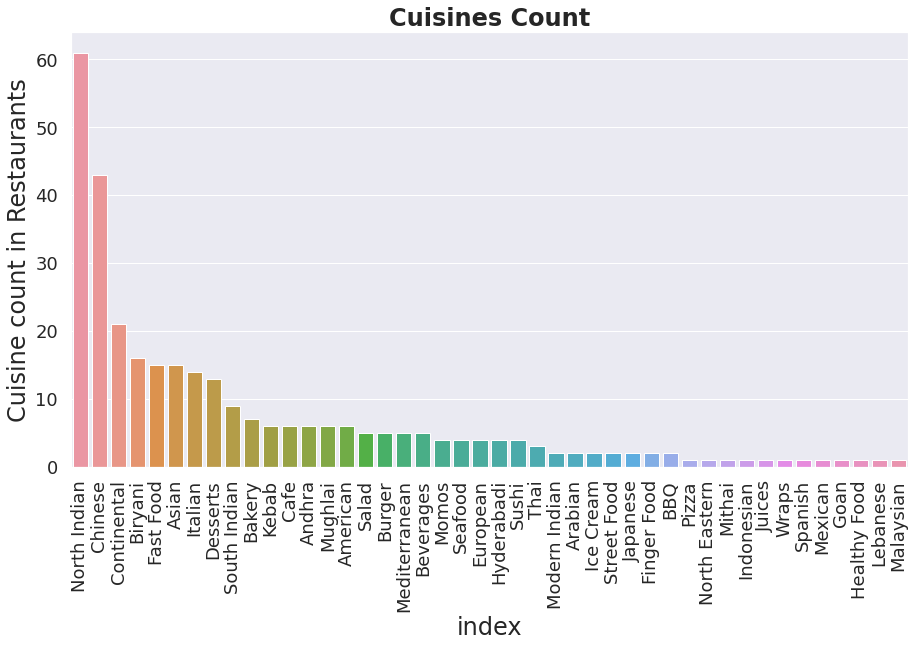

In [ ]:
# Visualization of Cuisines Count
plt.figure(figsize = (15, 8))
sns.set(font_scale = 2)
sns.barplot(data = cuis_df,x = cuis_df['index'],y = cuis_df['Cuisine count in Restaurants'])
plt.title('Cuisines Count',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [ ]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

chinese continental kebab european south indian north indian,biryani north indian chines,asian mediterranean north indian dessert,biryani north indian chinese seafood beverag,asian continental north indian chinese mediterranean,seafood goan north indian continental asian,healthy food north indian continental south indian,lebanes,american chinese north indian kebab south indian,ice cream dessert,street food north indian fast food,mediterranean north indian kebab bbq,continental american chines,north indian italian finger food,european mediterranean north indian,burger fast food,north indian,chinese north indian,north indian chinese continent,north indian chinese biryani,north indian,north indian japanese italian salad sushi,american,ice cream dessert,north indian chinese continent,continent,mexican italian north indian chinese salad,north indian mediterranean european,mughlai biryani,fast food,andhra south indian north indian,bakery north indian mughlai juices chines,arabian north india

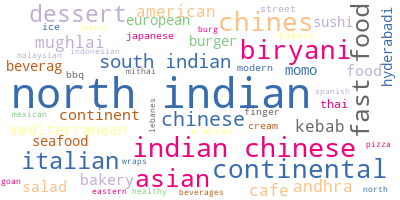

In [306]:
# Visualization of words from 'Cuisines' feature
df_name['Cuisines']= df_name['Cuisines'].astype(str)

ps = PorterStemmer() 
df_name['Cuisines']=df_name['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df_name['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

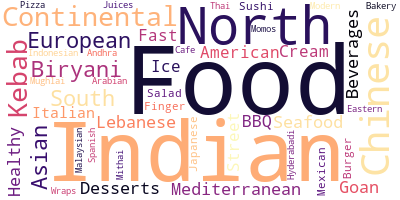

In [307]:
# Most nominated words from 'Cuisine' feature
words_list = cluisine_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(background_color='white',min_font_size = 1,colormap = 'magma').generate(strr) 
wordcloud.to_image()

#Distribuition of cost column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

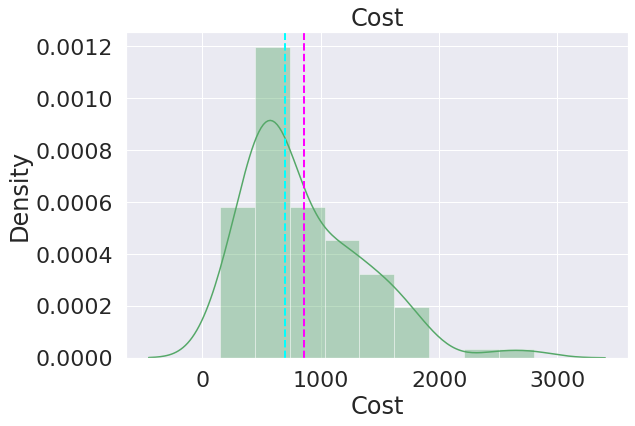

In [ ]:
plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
continous = df_name['Cost']
sns.distplot(df_name['Cost'], kde=True,ax=ax, color = 'g')
ax.axvline(continous.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(continous.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Cost')
plt.show()


In [ ]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
avg_cost = pd.DataFrame(df_name.groupby(df_name['Name']).agg({'Cost':'mean'})).reset_index()
avg_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
avg_cost.head()

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0


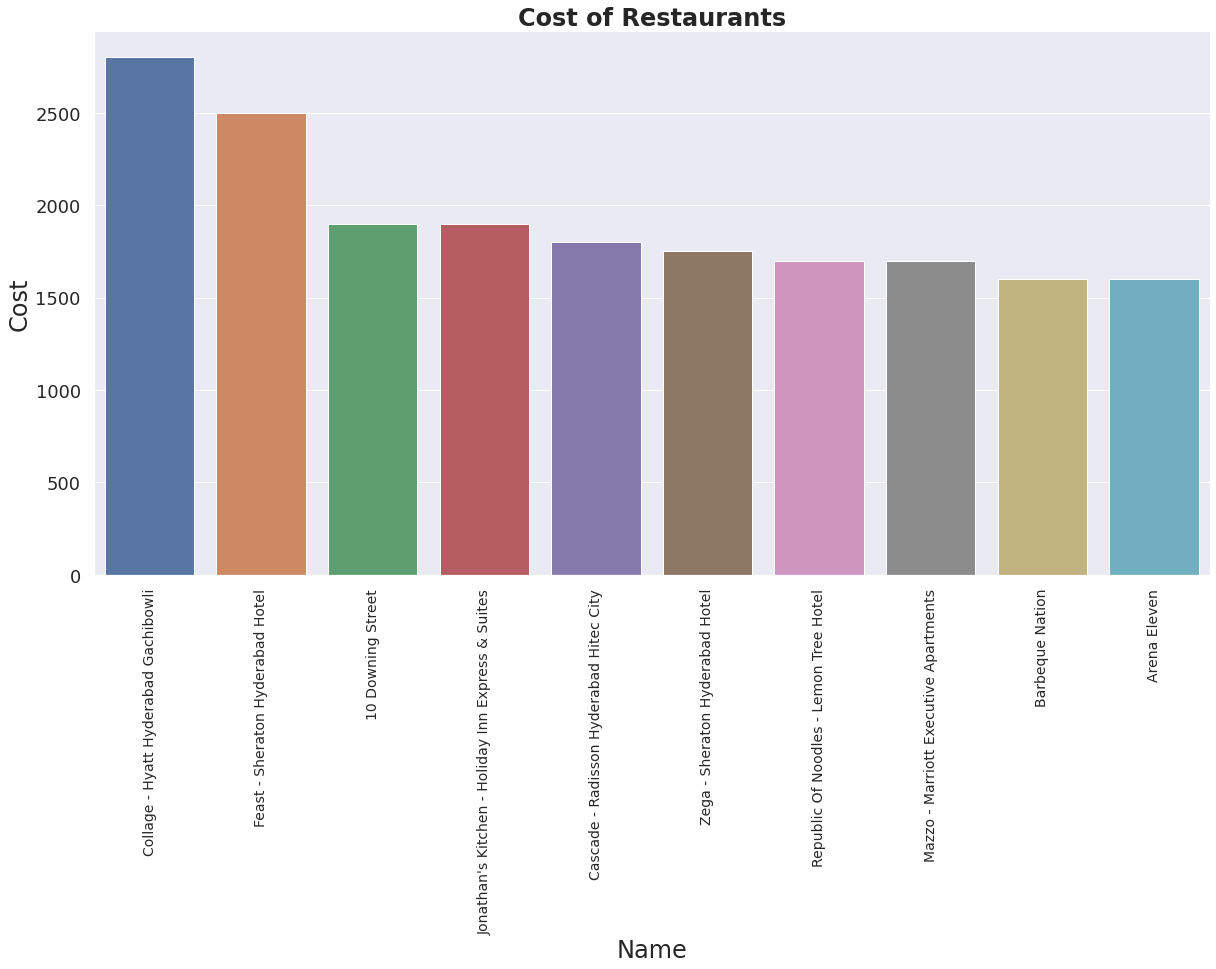

In [309]:
# Visualization of Top 10 Restaurant names and their respective cost
plt.figure(figsize = (20, 10))
sns.set(font_scale = 2)
sns.barplot(data = avg_cost[:10],x = avg_cost['Name'][:10],y = avg_cost['Cost'][:10])
plt.title('Cost of Restaurants',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df_name[['Cuisines','Links','Timings']])

In [ ]:
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
df_name['Cuisines']= df_name['Cuisines'].astype(str)

Create functions for preprocessing

In [ ]:
# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
      word = str(word)
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [ ]:
# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df_name[col_lst] = normalize(df_name[col_lst])

In [ ]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani north indian chinese,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,1300,asian mediterranean north indian desserts,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani north indian chinese seafood beverages,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,1200,asian continental north indian chinese mediter...,12noon to 11pm mon tue wed thu sun 12noon to 1...


# Preprocessing the dataset for Clustering models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(df_name['Cuisines'])

In [ ]:
X.shape

(105, 47)

In [ ]:
# Type of X object
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
# Converting 'X' object to array
X = X.toarray()

In [ ]:
type(X)

numpy.ndarray

# Elbow method to find appropriate 'K' value

In [310]:
from yellowbrick.cluster import KElbowVisualizer

In [332]:
# Function to find appropriate 'K' value
def KElbowvisualizer(metric):
  model = KMeans(max_iter=300,random_state=0)
  plt.figure(figsize=(10,5))
  sns.set(font_scale = 1)
  visualizer = KElbowVisualizer(model, k=(2,20),metric= metric, timings= False, locate_elbow= False)
  # # Fit the data to the visualize
  visualizer.fit(X)  
  visualizer.poof()

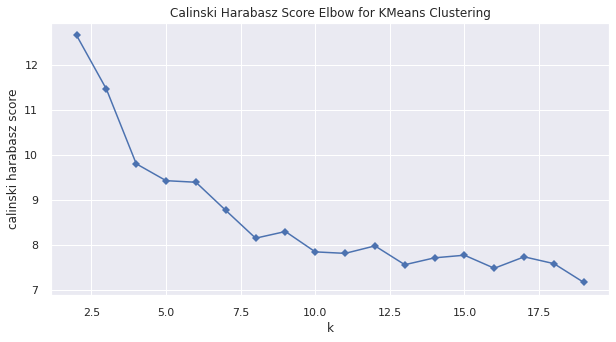

In [333]:
# KElbowvisualizer with metric as 'calinski_harabasz'
KElbowvisualizer('calinski_harabasz')

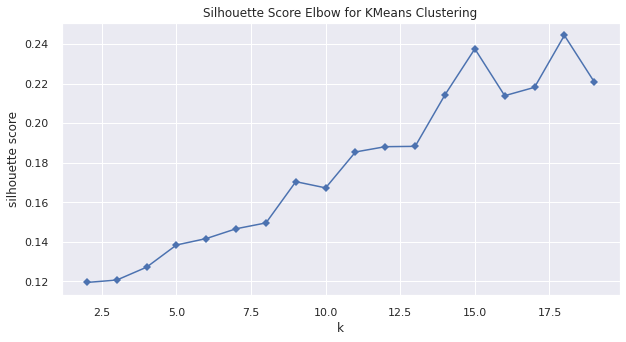

In [334]:
# KElbowvisualizer with metric as 'silhouette'
KElbowvisualizer('silhouette')

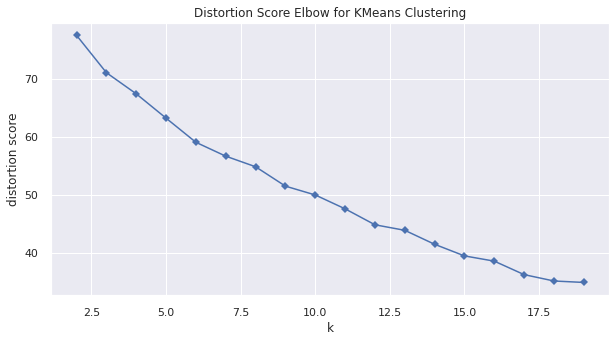

In [335]:
# KElbowvisualizer with metric as 'distortion
KElbowvisualizer('distortion')

##### From Elbow method, we got  k=15 as optimum value for cluster

## Calculate Silhoutte scores to find appropriate 'K' value

For n_clusters = 2 The average silhouette_score is : 0.13303050004562433
For n_clusters = 3 The average silhouette_score is : 0.12563213682403196
For n_clusters = 4 The average silhouette_score is : 0.13091072678600937
For n_clusters = 5 The average silhouette_score is : 0.12946437737370506
For n_clusters = 6 The average silhouette_score is : 0.14349870112479915
For n_clusters = 7 The average silhouette_score is : 0.14541138807136522
For n_clusters = 8 The average silhouette_score is : 0.1593251458323918
For n_clusters = 9 The average silhouette_score is : 0.16445298840864558
For n_clusters = 10 The average silhouette_score is : 0.16740248516802209
For n_clusters = 11 The average silhouette_score is : 0.1751651623186889
For n_clusters = 12 The average silhouette_score is : 0.19923724986385843
For n_clusters = 13 The average silhouette_score is : 0.18889858108128518
For n_clusters = 14 The average silhouette_score is : 0.2196048814473123
For n_clusters = 15 The average silhouette_score 

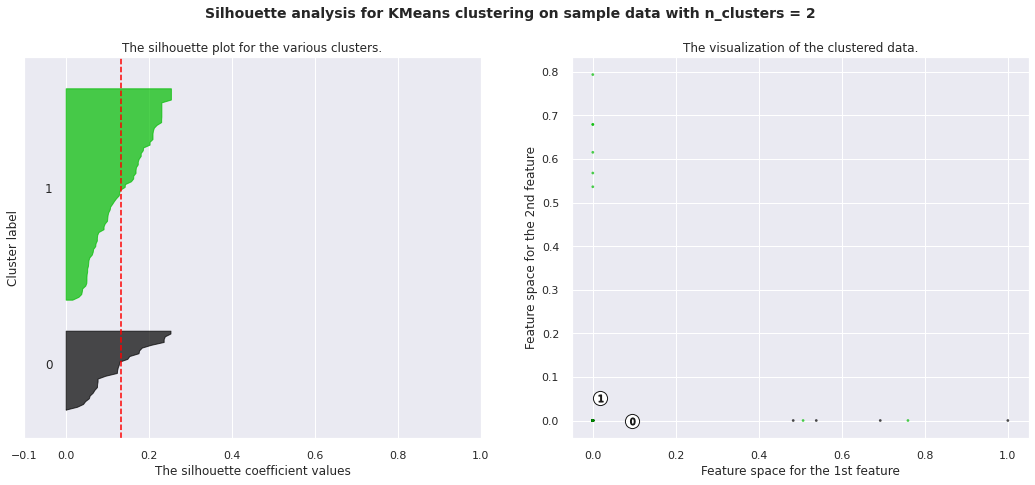

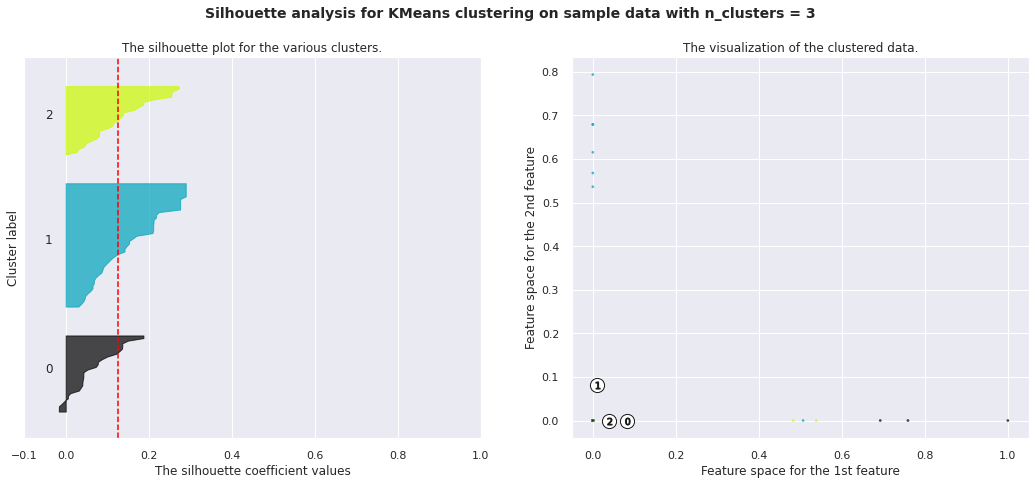

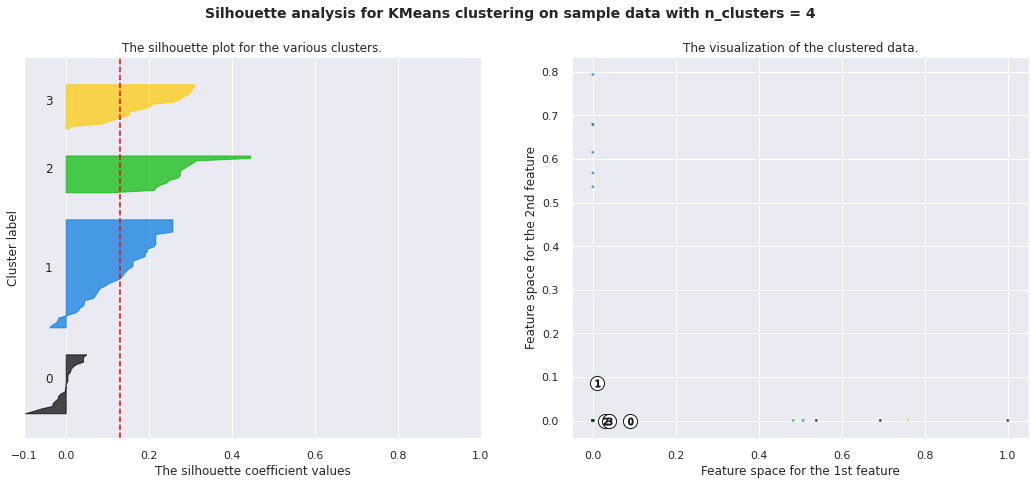

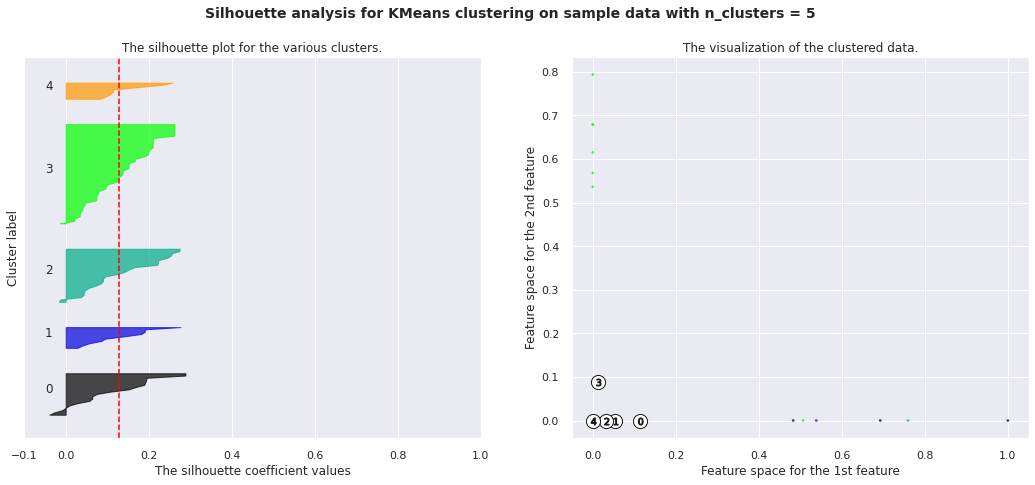

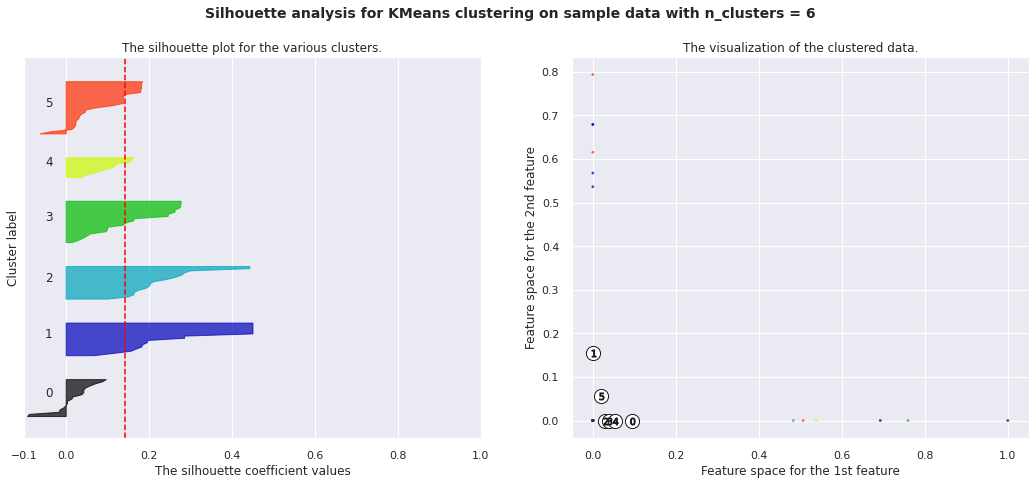

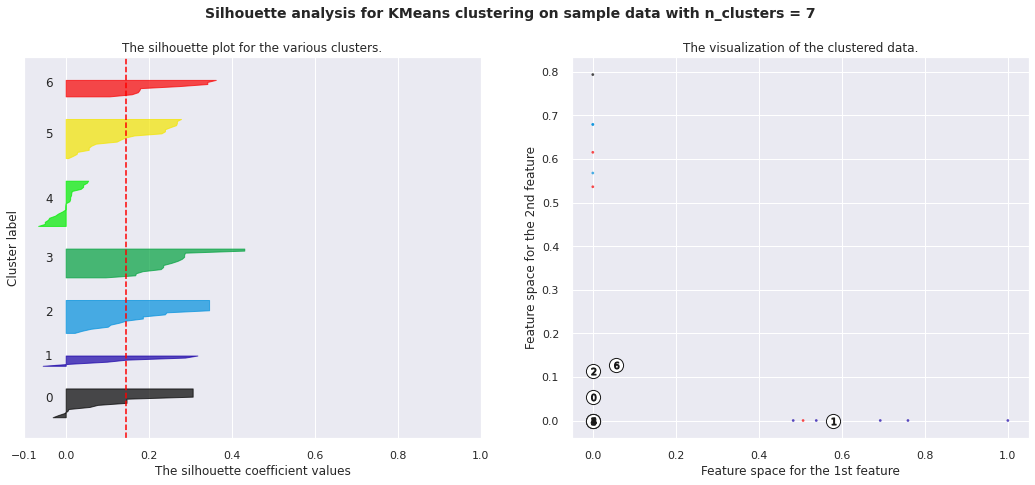

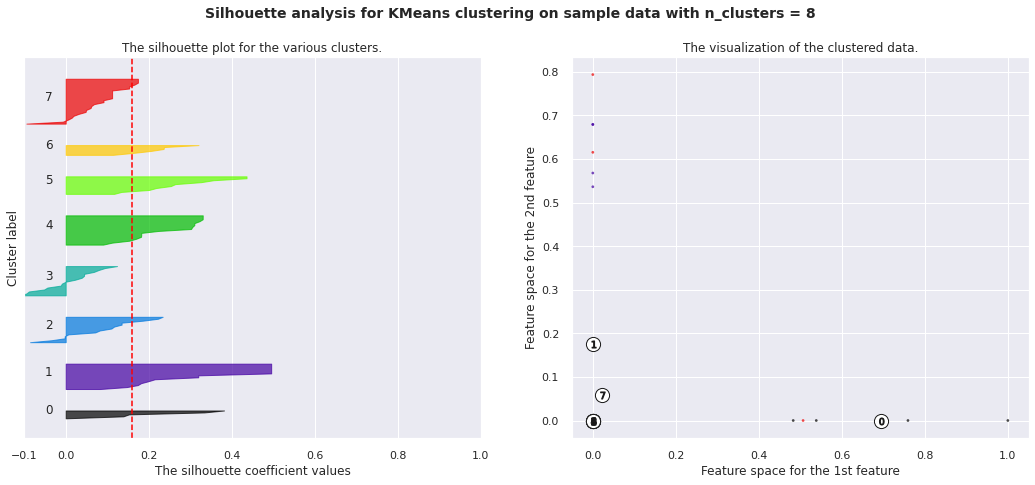

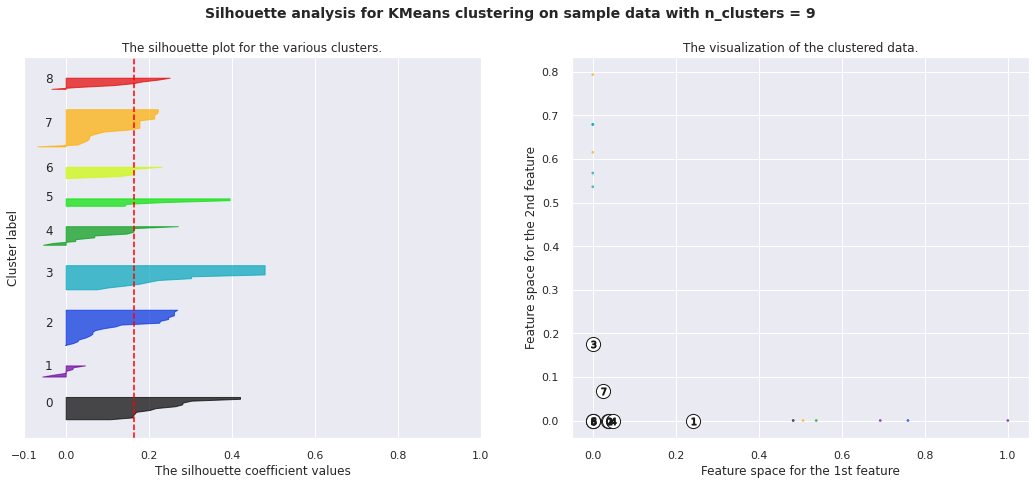

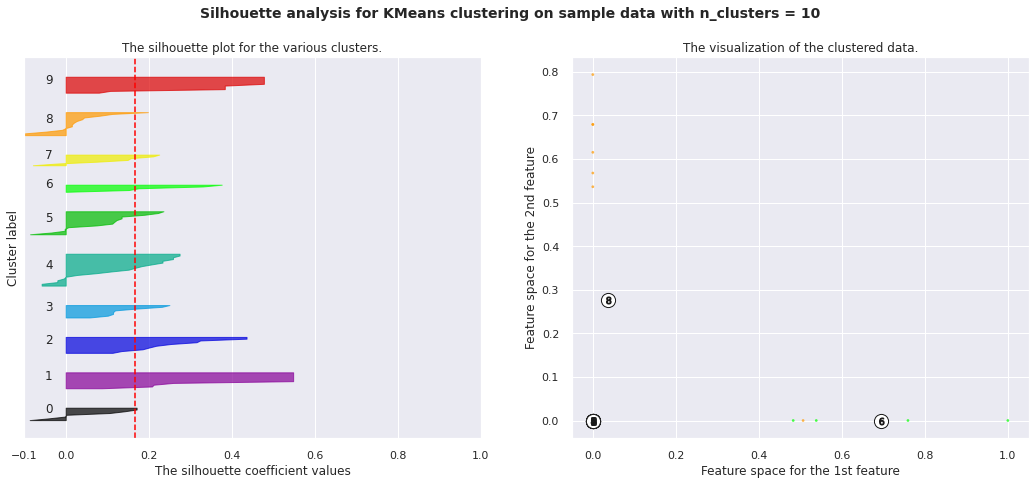

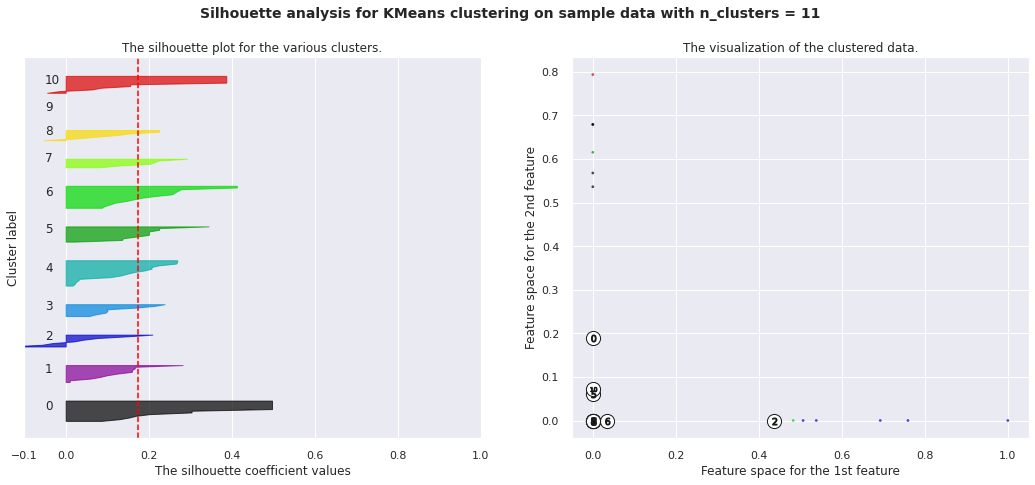

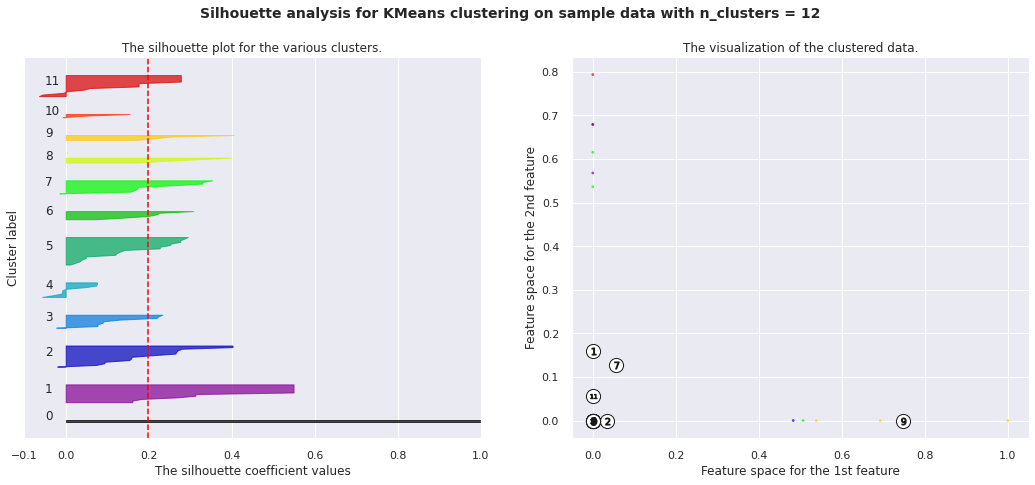

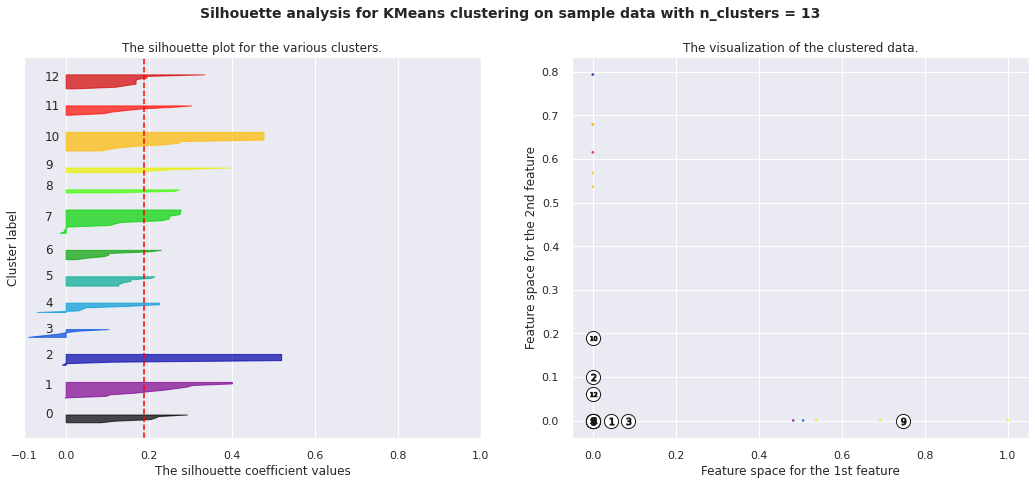

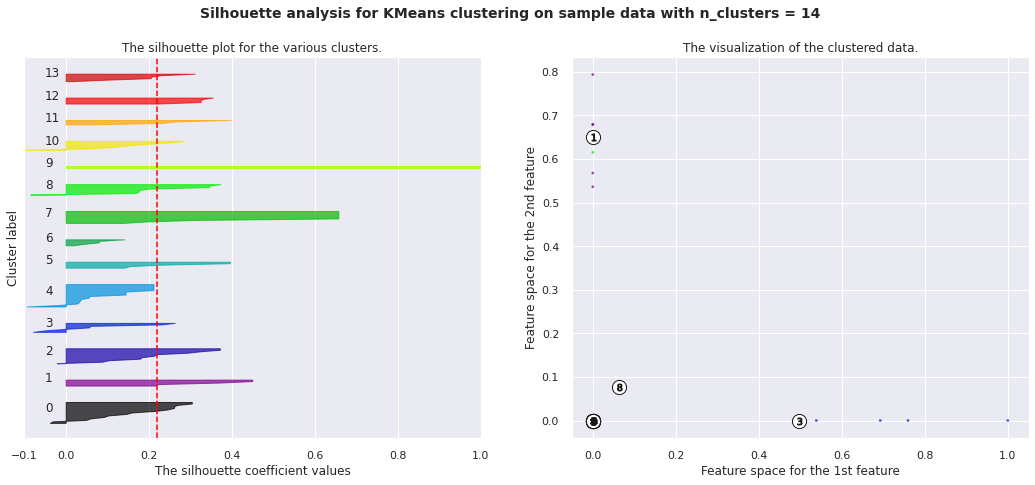

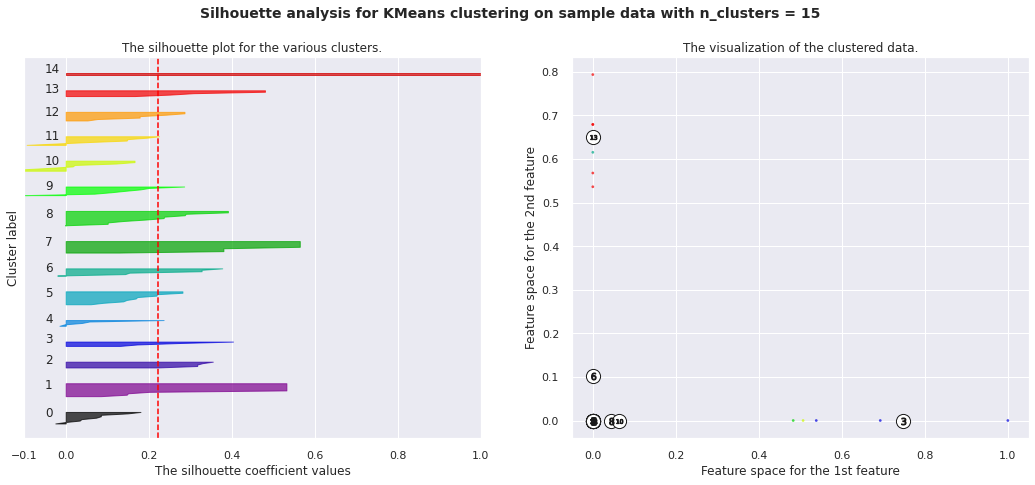

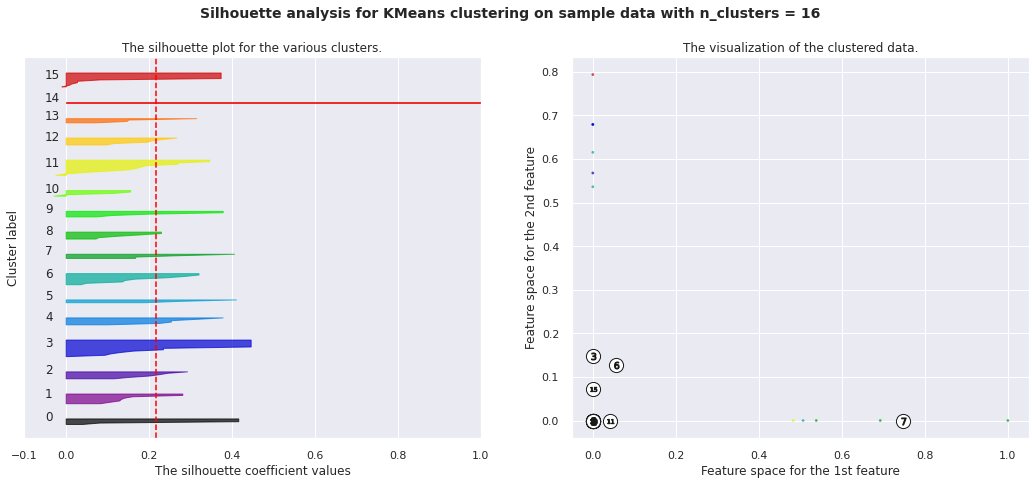

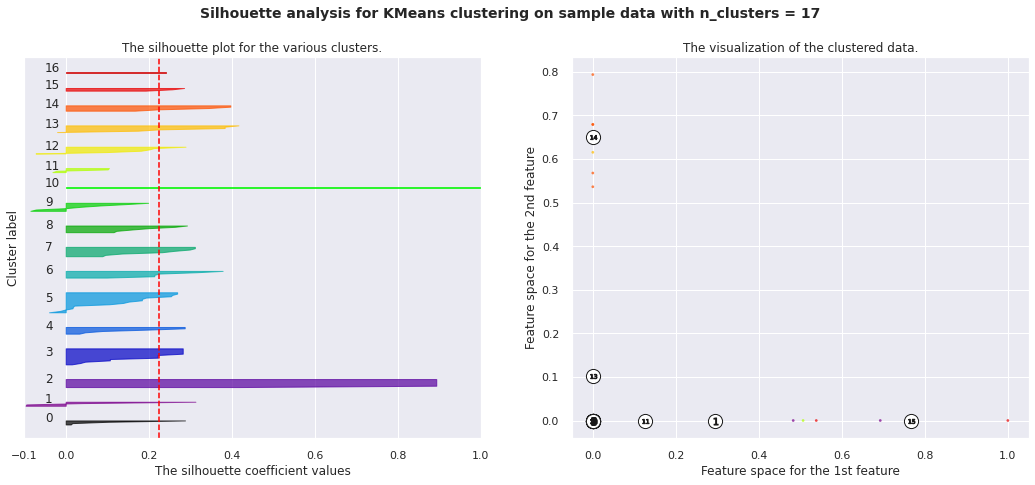

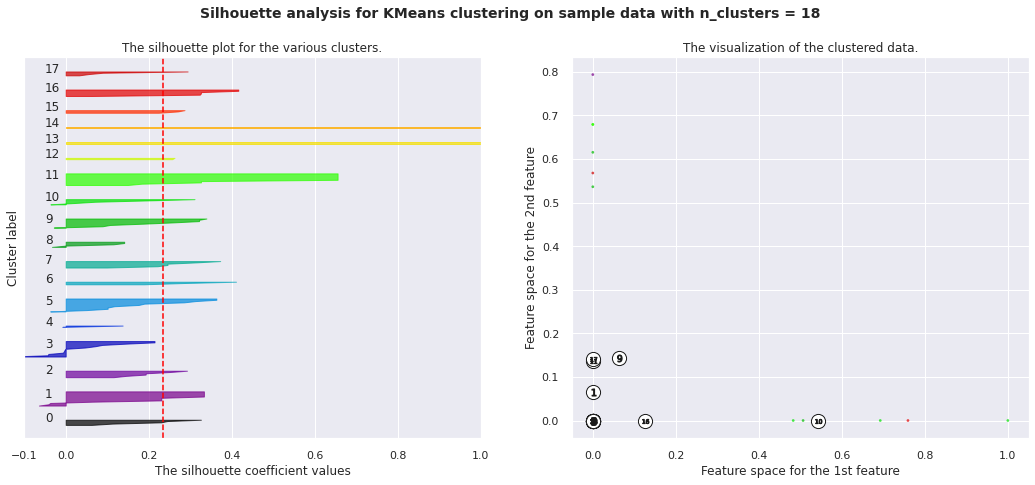

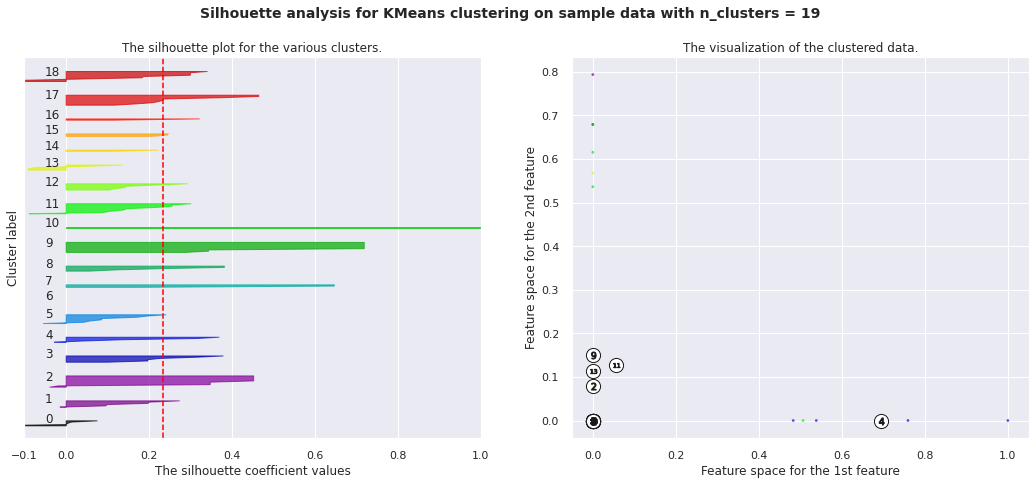

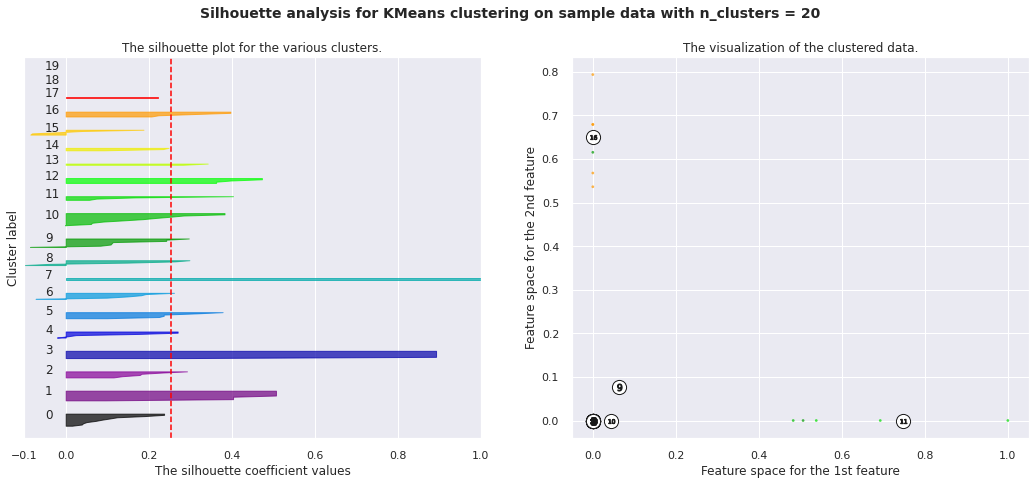

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
sillhouette_cluster_values={}

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    sillhouette_cluster_values[n_clusters] = silhouette_avg

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
silhouette_avg

0.25298907123683173

In [ ]:
sillhouette_cluster_values

{2: 0.13303050004562433,
 3: 0.12563213682403196,
 4: 0.13091072678600937,
 5: 0.12946437737370506,
 6: 0.14349870112479915,
 7: 0.14541138807136522,
 8: 0.1593251458323918,
 9: 0.16445298840864558,
 10: 0.16740248516802209,
 11: 0.1751651623186889,
 12: 0.19923724986385843,
 13: 0.18889858108128518,
 14: 0.2196048814473123,
 15: 0.223466153992775,
 16: 0.21859494903904222,
 17: 0.22544660976892683,
 18: 0.23418522246678014,
 19: 0.23518768830052064,
 20: 0.25298907123683173}

Text(0, 0.5, 'Sillhouette scores')

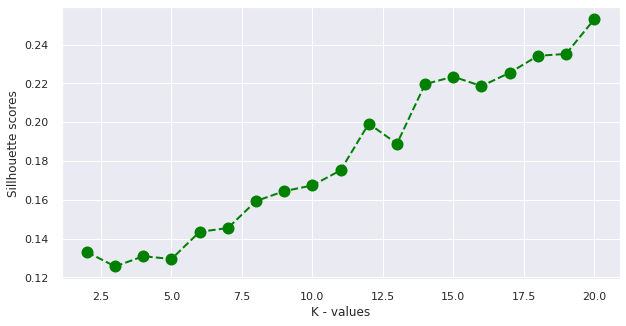

In [ ]:
x = list(sillhouette_cluster_values.keys())
y = list(sillhouette_cluster_values.values())
plt.figure(figsize=(10,5))
plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel("K - values")
plt.ylabel("Sillhouette scores")

##From the above graph we can take k = 15 as optimum value of silhouette score, as compared to Elbow method also we found k=15 as best value.

In [ ]:
# looks like we can go with 14 clusters.
# Creating an object for K Means clustering
kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1,random_state = 0)

In [ ]:
# MOdel fit
kmeans.fit(X)

KMeans(n_clusters=15, n_init=1, random_state=0)

In [ ]:
#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [ ]:
# Clusters center
clusters_center = kmeans.cluster_centers_

In [ ]:
[df_name['Cuisines'][15]]

['burger fast food']

In [ ]:
# Testin

X_new= vectorizer.transform([df_name['Cuisines'][15]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

9

In [ ]:
# Model Validation
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.189


In [ ]:
# Creating new feature to store labels
df_name['Kmeans_labels'] = kmeans.labels_

In [ ]:
# Creating a DataFrame for KMeans Labels visualization
Kmeans_labels_count = pd.DataFrame(df_name.groupby(['Kmeans_labels'])['Cuisines'].count()).reset_index()

In [ ]:
Kmeans_labels_count.head()

,Kmeans_labels,Cuisines
0,0,2
1,1,3
2,2,12
3,3,8
4,4,8


In [366]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Kmeans_labels',
       'Agglomerative_labels'],
      dtype='object')

In [ ]:
def labelsnobs(dataframe,x_value,y_value,palette_type,title,y_label):
  plt.figure(figsize = (20, 8))
  sns.set(font_scale = 2)
  sns.barplot(data = dataframe,x = x_value,y = y_value,palette=palette_type)
  plt.title(title,fontweight='bold')
  plt.ylabel(y_label)
  plt.xticks(rotation = 90,fontsize = 14)
  plt.yticks(fontsize = 18)
  plt.show()

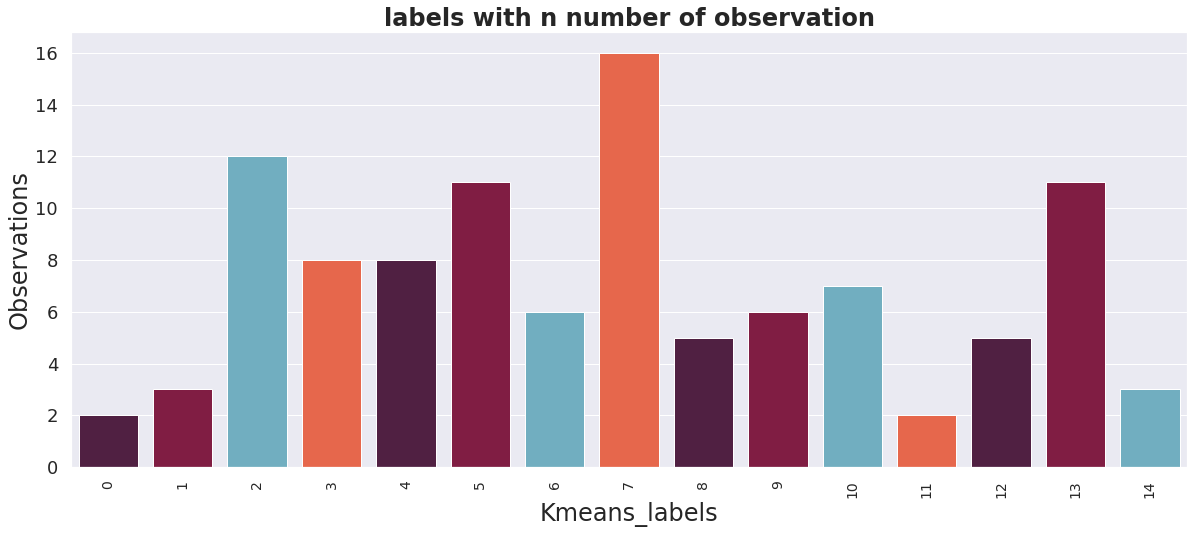

In [ ]:
# Visualization of Labels with n number of observations
labelsnobs(Kmeans_labels_count,Kmeans_labels_count['Kmeans_labels'],Kmeans_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [ ]:
# Getting terms
terms = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Top terms(words) in  per cluster set
print('\033[1m' + 'Top terms in each cluster:' + '\033[0m')
cuisines_list = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(15):
  num = str(i)
  # print('\033[1m' + 'Cluster:' + '\033[0m',i, end='')
  print('\033[1m' + 'Cluster:' + num + '\033[0m', end='')
  for ind in order_centroids[i, :10]:
    cuisines_list.append(terms[ind])
  print(cuisines_list)
  cuisines_list = []

Top terms in each cluster:
Cluster:0['finger', 'food', 'kebab', 'italian', 'north', 'indian', 'chinese', 'beverages', 'biryani', 'goan']
Cluster:1['continental', 'cafe', 'desserts', 'asian', 'fast', 'food', 'south', 'seafood', 'hyderabadi', 'mediterranean']
Cluster:2['bakery', 'desserts', 'cafe', 'cream', 'ice', 'lebanese', 'fast', 'food', 'mithai', 'beverages']
Cluster:3['biryani', 'chinese', 'north', 'indian', 'seafood', 'beverages', 'continental', 'food', 'momos', 'south']
Cluster:4['asian', 'momos', 'thai', 'sushi', 'chinese', 'eastern', 'malaysian', 'indonesian', 'north', 'indian']
Cluster:5['italian', 'continental', 'asian', 'indian', 'north', 'chinese', 'modern', 'spanish', 'kebab', 'goan']
Cluster:6['andhra', 'indian', 'biryani', 'north', 'chinese', 'south', 'hyderabadi', 'food', 'continental', 'italian']
Cluster:7['indian', 'north', 'chinese', 'south', 'salad', 'italian', 'seafood', 'arabian', 'mexican', 'american']
Cluster:8['mughlai', 'biryani', 'north', 'indian', 'beverages

In [364]:
# Grouping 'Kmeans_labels' and 'Name' feature
Kmeans_labels_name = pd.DataFrame(df_name.groupby(['Kmeans_labels'])['Name'],columns = ['KMeans_Cluster_labels','Restaurants'])
Kmeans_labels_name.set_index('KMeans_Cluster_labels', inplace=True)

In [ ]:
# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Kmeans_labels_name['Restaurants'][i])

In [367]:
df_name.head(1)

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels,Agglomerative_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun,10,12


In [378]:
#dataframe for creating scatter plot of all cluster of k-means
df_k = df_name
df_k = df_k.assign(Cuisines=df_k['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_k.columns, axis=1)


In [379]:
df_k.head()

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels,Agglomerative_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese,12noon to 330pm 630pm to 1130pm monsun,10,12
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,continental,12noon to 330pm 630pm to 1130pm monsun,10,12
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,kebab,12noon to 330pm 630pm to 1130pm monsun,10,12
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,european,12noon to 330pm 630pm to 1130pm monsun,10,12
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,south,12noon to 330pm 630pm to 1130pm monsun,10,12


In [398]:
fig = px.scatter(df_k, x="Cuisines", y="Name", color="Kmeans_labels", size='Cost', width=1500, height=800)
fig.show()


Agglomerative Clustering

In [ ]:
import inflect
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

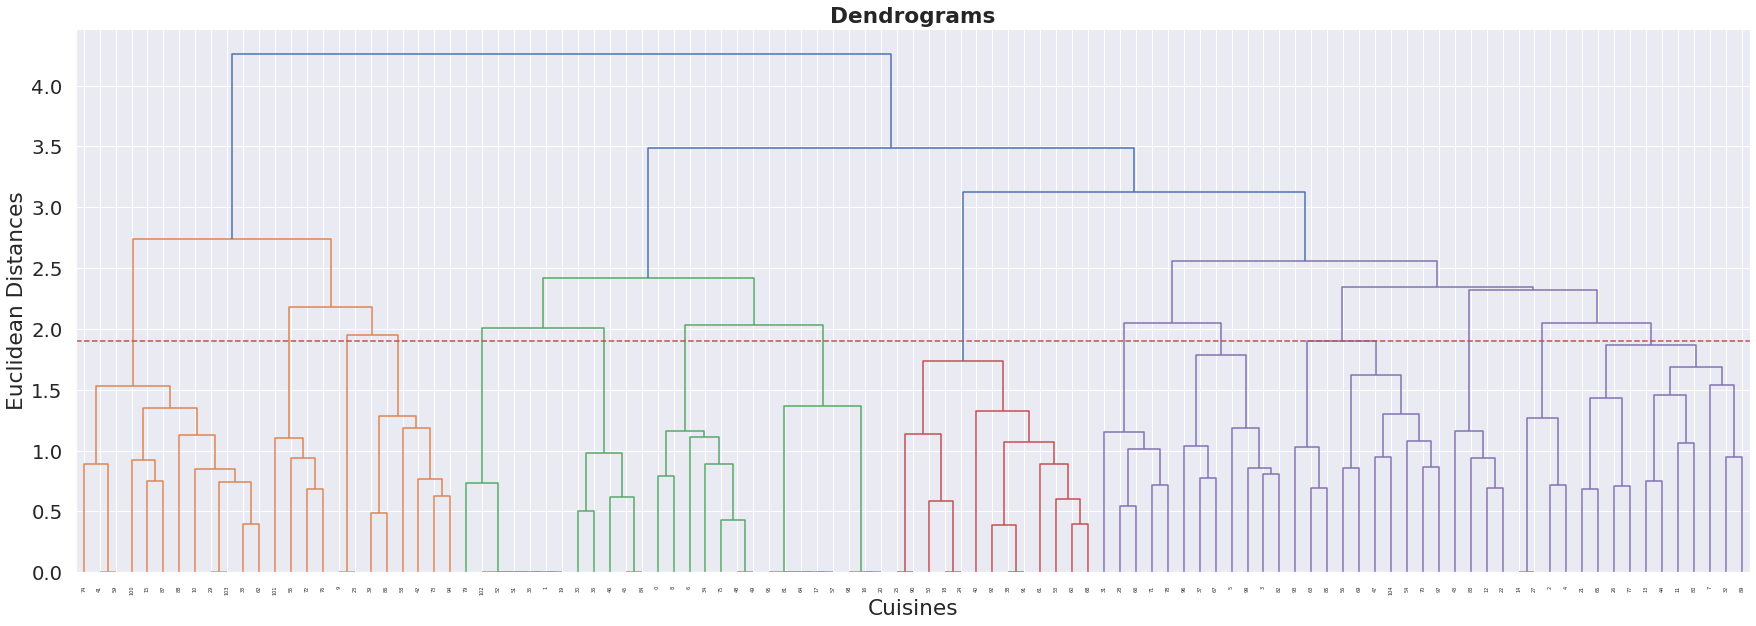

In [363]:
# Hierarchical Clustering for 'Cuisine' feature
plt.figure(figsize=(30,10))
sns.set(font_scale = 1.8)
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrograms',fontweight = 'bold')
plt.xlabel('Cuisines')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1.9, color='r', linestyle='--')
plt.show()


In [ ]:
# To choose appropriate K value

for k in range(2,20):
  aggh = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  
  aggh.fit(X)
  y_hc=aggh.fit_predict(X)
  print("For n_clusters =", k, "The average silhouette_score is :", round(silhouette_score(X, y_hc),5))

For n_clusters = 2 The average silhouette_score is : 0.12804
For n_clusters = 3 The average silhouette_score is : 0.09739
For n_clusters = 4 The average silhouette_score is : 0.11346
For n_clusters = 5 The average silhouette_score is : 0.11842
For n_clusters = 6 The average silhouette_score is : 0.13024
For n_clusters = 7 The average silhouette_score is : 0.12976
For n_clusters = 8 The average silhouette_score is : 0.14157
For n_clusters = 9 The average silhouette_score is : 0.15299
For n_clusters = 10 The average silhouette_score is : 0.16063
For n_clusters = 11 The average silhouette_score is : 0.17224
For n_clusters = 12 The average silhouette_score is : 0.18377
For n_clusters = 13 The average silhouette_score is : 0.19322
For n_clusters = 14 The average silhouette_score is : 0.22068
For n_clusters = 15 The average silhouette_score is : 0.23861
For n_clusters = 16 The average silhouette_score is : 0.24379
For n_clusters = 17 The average silhouette_score is : 0.25136
For n_clusters =

In [ ]:
# Creating an object for AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')

In [ ]:
# Fitting the model
aggh.fit(X)

AgglomerativeClustering(n_clusters=15)

In [ ]:
# Label Prediction
y_hc=aggh.fit_predict(X)

In [ ]:
# Labels
print(y_hc)

[12 13 10  6 10  6 12  2 12 14  4  2  8  2 10  4  5  5  1 13  5  2  8 14
  1  1  2 10 11  4  7 11  2  4 12 13  7  6  1  3  1  4  3  8  2  7  7  0
 12 12  1 13 13  1  0  9  0  5  3  4  1  1  4  0  5  2 11  6  1  0  0 11
  9  3  4 12  9  2 11 13  2  5  6  8  7  0  3  4  4  2  1  1  1  0  3  5
  6  0  5  6  4  9 13  4  0]


In [ ]:
# Creating new feature to store labels
df_name['Agglomerative_labels'] = aggh.labels_

In [ ]:
# Creating a DataFrame for KMeans Labels visualization
Agglomerative_labels_count = pd.DataFrame(df_name.groupby(['Agglomerative_labels'])['Cuisines'].count()).reset_index()

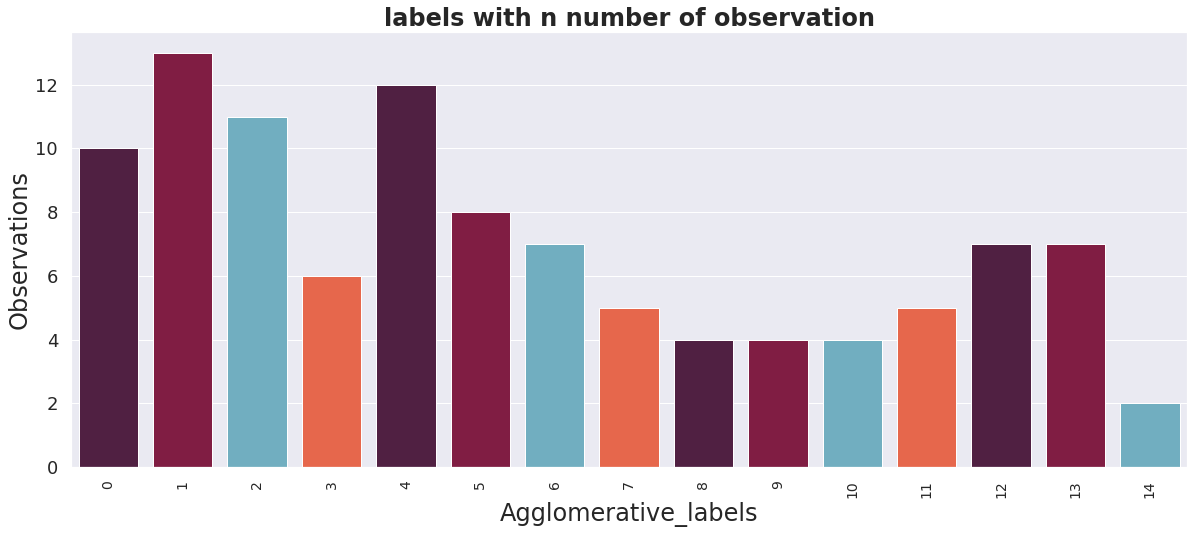

In [ ]:
# Visualization of Labels with n number of observations
labelsnobs(Agglomerative_labels_count,Agglomerative_labels_count['Agglomerative_labels'],Agglomerative_labels_count['Cuisines'],['#581845','#900C3F','C70039','#FF5733'],
           'labels with n number of observation', 'Observations')

In [ ]:
# Grouping 'Kmeans_labels' and 'Name' feature
Agglomerative_labels_name = pd.DataFrame(df_name.groupby(['Agglomerative_labels'])['Name'],columns = ['Agglomerative_labels','Restaurants'])
Agglomerative_labels_name.set_index('Agglomerative_labels', inplace=True)

In [336]:
df_name.head(1)

,Name,Links,Cost,Cuisines,Timings,Kmeans_labels,Agglomerative_labels
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun,10,12


In [ ]:
# Reataurant names with respect to each clusters
for i in range(0,15):
  num = str(i)
  print('Cluster:'+ num)
  print(Agglomerative_labels_name['Restaurants'][i])

Cluster:0
47                            Shanghai Chef 2
54                             Asian Meal Box
56           Feast - Sheraton Hyderabad Hotel
63                               Dine O China
69                             The Indi Grill
70                 Urban Asia - Kitchen & Bar
85                              Momos Delight
93                   Zing's Northeast Kitchen
97            Zega - Sheraton Hyderabad Hotel
104    Republic Of Noodles - Lemon Tree Hotel
Name: Name, dtype: object
Cluster:1
18                          10 Downing Street
24                                      SKYHY
25                                 Tiki Shack
38                            The Glass Onion
40                                Frio Bistro
50                              Gal Punjab Di
53                            Diners Pavilion
60                                 PourHouse7
61                       Prism Club & Kitchen
68                      The Tilt Bar Republic
90                               A

In [400]:
df_name.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Kmeans_labels',
       'Agglomerative_labels'],
      dtype='object')

In [401]:
#dataframe for creating scatter plot of all cluster of Agglomerative cluster
df_agg = df_name
df_agg = df_agg.assign(Cuisines=df_agg['Cuisines'].str.split(' ')).explode('Cuisines').reindex(df_agg.columns, axis=1)

In [402]:
#plotting
fig = px.scatter(df_agg, x="Cuisines", y="Name", color="Agglomerative_labels", size='Cost', width=1500, height=800)
fig.show()




Loading Zomato Restaurant Reviews CSV file

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Data/Zomato Restaurant reviews.csv')



In [ ]:
df_review=data2.copy()

In [ ]:
#Shape
df_review.shape

(10000, 7)

In [ ]:
# Head
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Info
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# Null values treatment

In [ ]:
# Dropping rows with Null values
df_review = df_review.dropna(axis =0)

In [ ]:
df_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
#Drop row for Like as Rating
a = df_review[df_review['Rating']=='Like'].index
df_review.drop(a,inplace=True)

In [ ]:
df_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

##Go through all features one by one

In [ ]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9954 non-null   object
 1   Reviewer    9954 non-null   object
 2   Review      9954 non-null   object
 3   Rating      9954 non-null   object
 4   Metadata    9954 non-null   object
 5   Time        9954 non-null   object
 6   Pictures    9954 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.1+ KB


In [ ]:
# Converting 'Rating' feature to Float datatype
df_review['Rating'] = df_review['Rating'].apply(lambda x: float(x))

In [ ]:
# Summary
df_review.describe()

,Rating,Pictures
count,9954.000000,9954.000000
mean,3.600261,0.751959
std,1.483573,2.575819
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


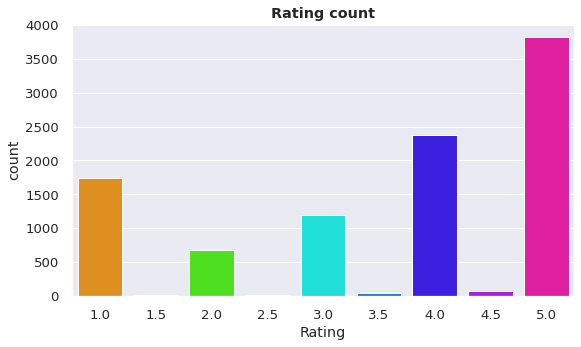

In [ ]:
# Count plot for Rating
plt.figure(figsize = (9,5))
sns.set(font_scale = 1.2)
sns.countplot(x='Rating',data = df_review, palette = 'hsv')
plt.title('Rating count',fontweight = 'bold')
plt.show()

Most of the customer has given 5 rating

In [ ]:
# Downloading stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stop words
stop_words = stopwords.words('english')
# Rest words
rest_word = ['order','restaurant','taste','ordered','good','food','table','place','one','also']

In [ ]:
df_review['Reviews_txt_processed'] = df_review['Review']

In [ ]:
# Wordcloud for Reviews
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].map(lambda x: re.sub('[,\.!?]','', x))
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].map(lambda x: x.lower())
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].map(lambda x: x.split())
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].apply(lambda x: [words for words in x if words not in stop_words])
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].apply(lambda x: [words for words in x if words not in rest_word])
df_review['Reviews_txt_processed'] = df_review['Reviews_txt_processed'].astype(str)

In [ ]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews_txt_processed
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"['ambience', 'quite', 'saturday', 'lunch', 'co..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,"['ambience', 'pleasant', 'evening', 'service',..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,"['must', 'try', 'great', 'great', 'ambience', ..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,"['soumen', 'das', 'arun', 'great', 'guy', 'beh..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,"['goodwe', 'kodi', 'drumsticks', 'basket', 'mu..."


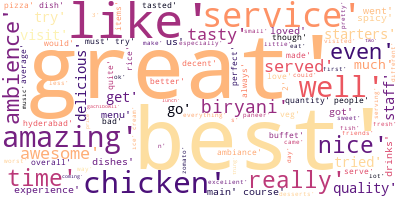

In [ ]:
#Wordcloud for Reviews
ps = PorterStemmer() 
long_string = ','.join(list(df_review['Reviews_txt_processed'].values))
# print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'magma')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Positive Reviews(Ratings greater than 3)
pos_rev = df_review[df_review['Rating'] > 3]

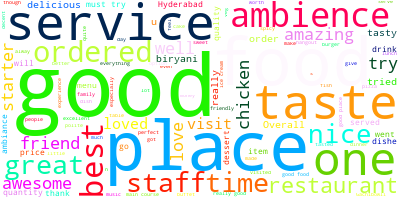

In [ ]:
# Wordcloud for Positive reviews
long_string = ','.join(list(pos_rev['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=13,colormap = 'gist_ncar')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Extracting the number of reviews
df_review['Metadata'] = df_review['Metadata'].str.split(' ')
df_review['Metadata'] = df_review['Metadata'].apply(lambda x: x[0])
df_review['Metadata'] = df_review['Metadata'].apply(lambda x : int(x))

In [ ]:
# Creating a dataframe to store top 10 reviewers
top_reviewers = pd.DataFrame(df_review.groupby(['Reviewer','Metadata']).sum()).reset_index()
top_reviewers = top_reviewers.sort_values(by = 'Metadata',ascending = False)
top_reviewers = top_reviewers[:15]
top_reviewers.head()

,Reviewer,Metadata,Rating,Pictures
818,Anvesh Chowdary,1031,10.0,0
7802,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,2.0,0
80,Abc098,665,3.0,0
3409,Mithun Ravindranathan,560,4.0,0
3455,Mohd Zubair Ali (Hyderabad.Food.Diaries),482,4.0,0


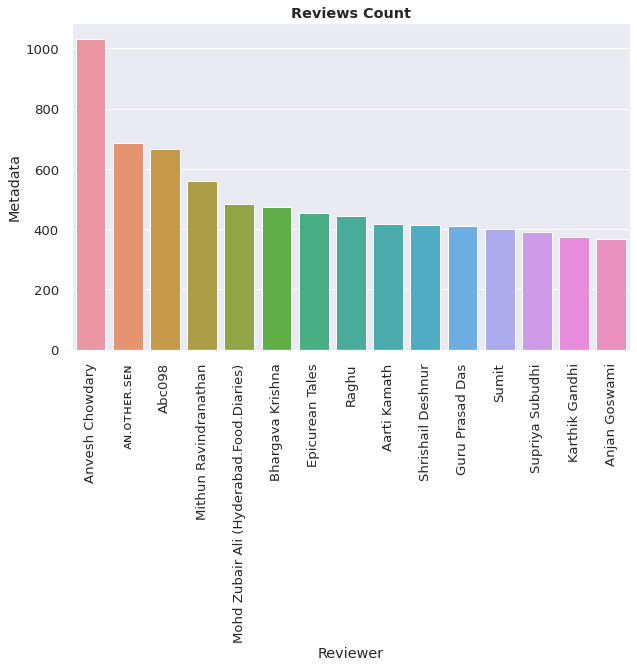

In [ ]:
# Visualization of top 10 reviewers
plt.figure(figsize = (10,6))
sns.barplot(data = top_reviewers,x = 'Reviewer',y = 'Metadata')
plt.title('Reviews Count',fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Top 10 Restaurants with high average rating
df_review['Rating'] = df_review['Rating'].apply(lambda x: float(x))
avg_ratings = pd.DataFrame(df_review.groupby('Restaurant')['Rating'].mean()).reset_index()
avg_ratings = avg_ratings.sort_values(by = 'Rating',ascending = False)
avg_ratings = avg_ratings[:10]

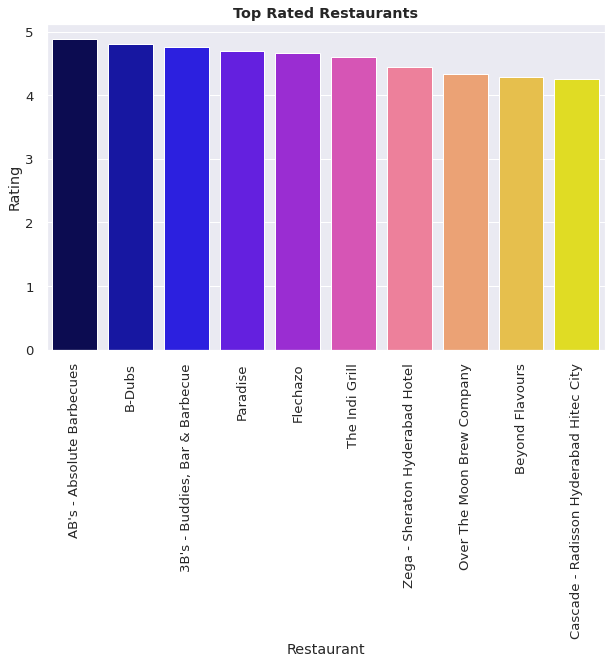

In [ ]:
# Visualization of top 10 reviewers
plt.figure(figsize = (10,6))
sns.barplot(data = avg_ratings,x = 'Restaurant',y = 'Rating', palette = 'gnuplot2')
plt.title('Top Rated Restaurants',fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

# Sentiment Analysis




Merging both datasets

In [ ]:
# shape of two dataframes
print(df_name.shape)
print(df_review.shape)

(105, 7)
(9954, 8)


In [ ]:
#number of unique data frame in 'Zomato Restaurant names and Metadata' dataframe
df_name['Name'].nunique()

105

In [ ]:
#number of unique data frame in 'Zomato Restaurant names and Metadata' dataframe
df_review['Restaurant'].nunique()

100

Zomato Restaurant names and Metadata has 105 unique Restaurants. Zomato Restaurant reviews has 100 unique Restaurants. For merging two dataframes we are to remove non-common Restaurants.

In [ ]:
lst = []
for name in df_name['Name'].unique():
  if name not in df_review['Restaurant'].unique():
    lst.append(name)

lst

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [ ]:
# Filtering out rows 
final = df_name
for not_com_rest_names in lst:
  final = final[final['Name'] != not_com_rest_names]

In [ ]:
# Renaming the column 'Restaurant'
df_review.rename(columns = {'Restaurant':'Name'}, inplace = True)

In [ ]:
# Merging two dataframes
merged_df = pd.merge(df_review, final, how='left', on='Name')

In [ ]:
merged_df.columns

Index(['Name', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures',
       'Reviews_txt_processed', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Kmeans_labels', 'Agglomerative_labels'],
      dtype='object')

In [ ]:
# Droping less significant features
merged_df.drop(['Time','Metadata','Links','Timings','Kmeans_labels','Agglomerative_labels'],axis = 1,inplace = True)

In [ ]:
# Re-indexing the columns
merged_df = merged_df.reindex(columns=['index','Name', 'Reviewer','Review','Reviews_txt_processed','Review_length','Rating','Polarity','Cost','Cuisines'])

In [ ]:
# Shape
merged_df.shape

(9954, 10)

In [ ]:
# Head
merged_df.head(2)

,index,Name,Reviewer,Review,Reviews_txt_processed,Review_length,Rating,Polarity,Cost,Cuisines
0,NaN,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...","['ambience', 'quite', 'saturday', 'lunch', 'co...",NaN,5.0,NaN,800,chinese continental kebab european south india...
1,NaN,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,"['ambience', 'pleasant', 'evening', 'service',...",NaN,5.0,NaN,800,chinese continental kebab european south india...


In [ ]:
# Creating dataframe to store avg rating and avg cost for each reataurant
ratingncost = pd.DataFrame(merged_df.groupby('Name')['Rating','Cost'].mean()).reset_index()
print(ratingncost)

                                     Name  Rating    Cost
0                       10 Downing Street    3.80  1900.0
1                                13 Dhaba    3.48   450.0
2          3B's - Buddies, Bar & Barbecue    4.76  1100.0
3               AB's - Absolute Barbecues    4.88  1500.0
4                       Absolute Sizzlers    3.62   750.0
..                                    ...     ...     ...
95             Urban Asia - Kitchen & Bar    3.65  1100.0
96  Yum Yum Tree - The Arabian Food Court    3.56  1200.0
97        Zega - Sheraton Hyderabad Hotel    4.45  1750.0
98               Zing's Northeast Kitchen    3.65   550.0
99                                eat.fit    3.20   500.0

[100 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


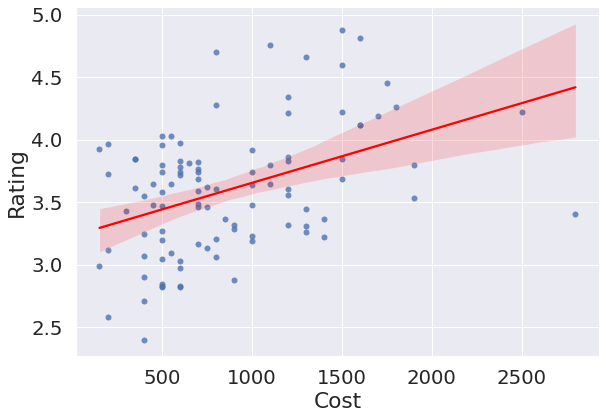

In [406]:
#correlation of rating and cost
sns.lmplot(y='Rating',x='Cost',data=ratingncost,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

In [405]:
#Visualization of Restaurant Cost vs Rating
plt.figure(figsize=(40,10))
fig = px.bar(ratingncost, x="Name", y="Cost",color="Rating",width=1200, height=800)
fig.update_xaxes(ticks="outside", tickwidth=1, tickcolor='maroon',tickangle=90, ticklen=10)
fig.update_layout(title_text="Restaurant Cost vs Rating")
fig.show()

<Figure size 2880x720 with 0 Axes>

In [ ]:
# Tokenizer
tokenizer_vader = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer_vader.fit_on_texts(merged_df['Review'])

In [ ]:
# Appling text processing function
merged_df['Review'] = merged_df['Review'].apply(normalize)

In [ ]:
# Replacing comma
merged_df['Review'] = merged_df['Review'].apply(lambda x: ','.join(x))
merged_df['Review'] = merged_df['Review'].apply(lambda x: x.replace(',',''))

In [ ]:
merged_df['Review']

0       the ambience was good food was quite good  had...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9949    madhumathi mahajan well to start with nice cou...
9950    this place has never disappointed us the food ...
9951    bad rating is mainly because of chicken bone f...
9952    i personally love and prefer chinese food had ...
9953    checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
# Function for removing Stopwords
def remove_stop_words(col_name):
  stop = stopwords.words('english')
  merged_df[col_name] = merged_df[col_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Applying function to remove stopwords
remove_stop_words('Review')


In [ ]:
merged_df.head()

,index,Name,Reviewer,Review,Reviews_txt_processed,Review_length,Rating,Polarity,Cost,Cuisines
0,NaN,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,"['ambience', 'quite', 'saturday', 'lunch', 'co...",NaN,5.0,NaN,800,chinese continental kebab european south india...
1,NaN,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,"['ambience', 'pleasant', 'evening', 'service',...",NaN,5.0,NaN,800,chinese continental kebab european south india...
2,NaN,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,"['must', 'try', 'great', 'great', 'ambience', ...",NaN,5.0,NaN,800,chinese continental kebab european south india...
3,NaN,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,"['soumen', 'das', 'arun', 'great', 'guy', 'beh...",NaN,5.0,NaN,800,chinese continental kebab european south india...
4,NaN,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,"['goodwe', 'kodi', 'drumsticks', 'basket', 'mu...",NaN,5.0,NaN,800,chinese continental kebab european south india...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Creating an object for SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Applying 'SentimentIntensityAnalyzer' for Reviews
merged_df['SIA_polarity'] = merged_df['Review'].apply(lambda x: sia.polarity_scores(x))

In [ ]:
# Function for extracting Polarity values
def SIA_ploaritysep(new_col,dict_key):
  merged_df[new_col] = merged_df['SIA_polarity'].apply(lambda x: x[dict_key])

In [ ]:
# Applying 'nltkploaritysep' function
SIA_ploaritysep('SIA_Compound','compound')
SIA_ploaritysep('SIA_Positive','pos')
SIA_ploaritysep('SIA_Neutral','neu')
SIA_ploaritysep('SIA_Negative','neg')

In [407]:
# Function for bar plot in vader dataframe
def barplotpolarity(x,y,palette):
  plt.figure(figsize = (10,7))
  sns.barplot(data = merged_df,x = x,y = y,palette = palette)
  plt.show()

In [ ]:
merged_df.head(2)

,index,Name,Reviewer,Review,Reviews_txt_processed,Review_length,Rating,Polarity,Cost,Cuisines,SIA_polarity,SIA_Compound,SIA_Positive,SIA_Neutral,SIA_Negative
0,NaN,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,"['ambience', 'quite', 'saturday', 'lunch', 'co...",NaN,5.0,NaN,800,chinese continental kebab european south india...,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp...",0.9664,0.559,0.441,0.0
1,NaN,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,"['ambience', 'pleasant', 'evening', 'service',...",NaN,5.0,NaN,800,chinese continental kebab european south india...,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...",0.9360,0.630,0.370,0.0


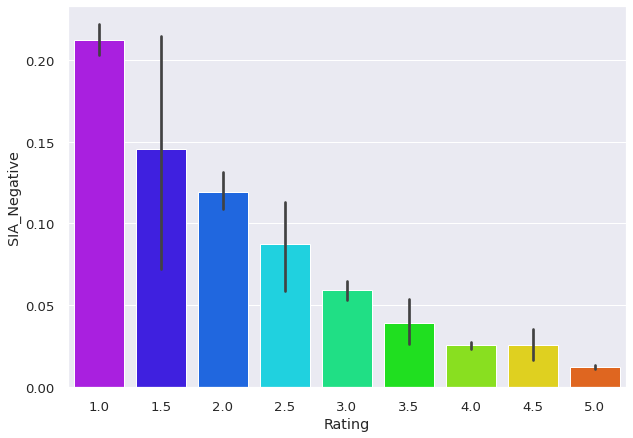

In [ ]:
# Neagtive Polarity
barplotpolarity('Rating','SIA_Negative','gist_rainbow_r')

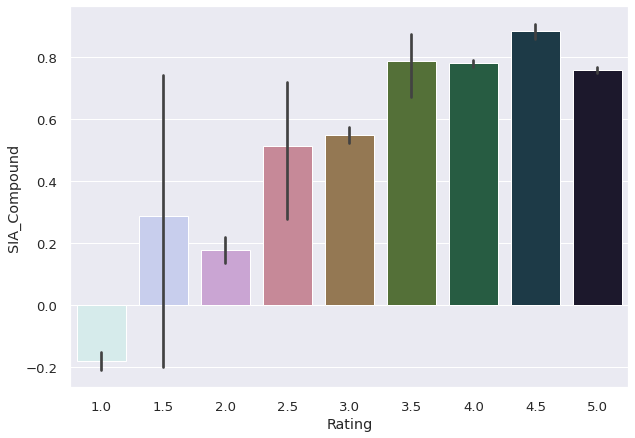

In [ ]:

# Compound Polarity
barplotpolarity('Rating','SIA_Compound','cubehelix_r')

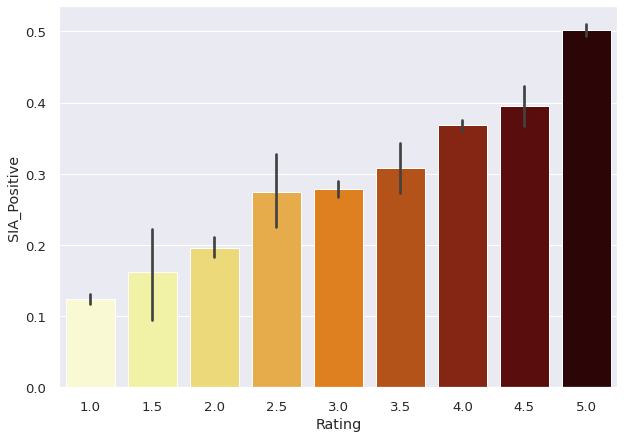

In [ ]:
# Positive Polarity
barplotpolarity('Rating','SIA_Positive','afmhot_r')

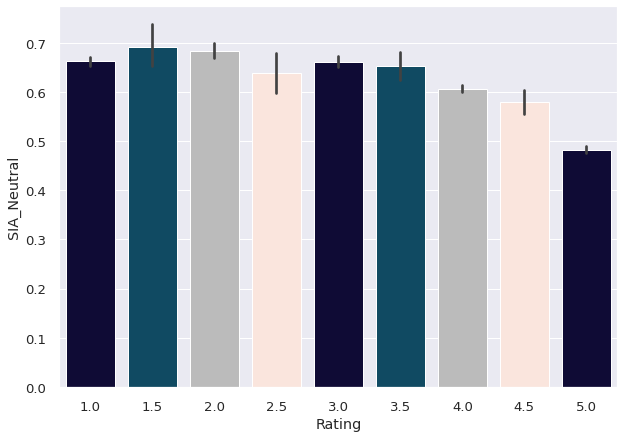

In [ ]:
# Neutral Polarity
barplotpolarity('Rating','SIA_Neutral',['#0A043C','#03506F','#BBBBBB','#FFE3D8'])

In [ ]:
# Function for Polarity Distribution plot
def dist_polarity(df,xlabel,color):
  plt.figure(figsize=(8,5))
  xticks = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
  sns.distplot(df,bins = 100,color= color)
  plt.title('Distribution plot for Polarity',fontsize = 12,fontweight = 'bold')
  plt.xlabel(xlabel,fontsize = 12)
  plt.ylabel('Density',fontsize = 12)
  plt.xticks(xticks,fontsize = 8)
  plt.show()

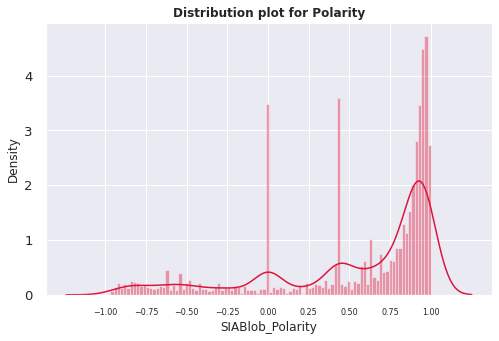

In [ ]:
# SIA distribution plot
dist_polarity(merged_df['SIA_Compound'],'SIABlob_Polarity','crimson')

In [ ]:
# Mapping the sentiments.
# Positive for SIA_Compound > 0
# Negative for SIA_Compound < 0
# Neutral for SIA_Compound = 0
merged_df['SIA_Sentiment'] = merged_df['SIA_Compound'].apply(lambda x: 'Positive' if (x > 0) else ('Negative' if (x<0) else 'Neutral'))

In [ ]:
# Function for pie chart
def piechart(df,colors):
  pos = (df.value_counts()[0]/df.count())*100
  neg = (df.value_counts()[1]/df.count())*100
  neu = (df.value_counts()[2]/df.count())*100
  # Pie chart for Percentage of Reviews Sentiment
  plt.figure(figsize = (10,6))
  plt.pie([pos,neg,neu],labels = ['Positive','Neutral','Negative'],autopct='%1.1f%%',colors =colors,)
  plt.title('Percentage of Reviews Sentiment')
  plt.show()

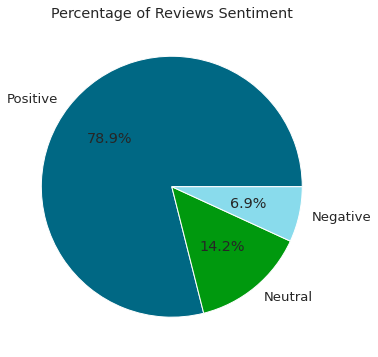

In [ ]:
# Pie chart
piechart(merged_df['SIA_Sentiment'],colors = ['#006884','#00990E','#89DBEC'])

In [ ]:
# Reviews Sentiment
merged_df['SIA_Sentiment'].value_counts()

Positive    7857
Negative    1415
Neutral      682
Name: SIA_Sentiment, dtype: int64

In [ ]:
# Function for plotting most common words in different sentiments
def word_frequency(df,ylim1,ylim2,title,color):
  vectorizer = TfidfVectorizer(stop_words='english')

  temp = df
  corpus = []
  temp['Review'].apply(lambda x: corpus.append(x))

  text = []
  freq = []
  X = vectorizer.fit_transform(corpus)
  # this will give you words instead of tfidf where tfidf > 0
  X_words = vectorizer.inverse_transform(X) 
  # return tokenizer function used in tfidfvectorizer
  tokenizer = vectorizer.build_tokenizer()

  for idx,words in enumerate(X_words):
      for word in words:
          count = tokenizer(corpus[idx]).count(word)
          text.append(word)
          freq.append(count)
          # print(type(word))
          # print(idx,word,count)


  # Creating a dataframe to store the words and its frequency 
  words_counts = pd.DataFrame(freq,text).reset_index()
  words_counts.rename({0:'Frequency'},axis = 1,inplace = True)
  words_counts = words_counts.groupby('index').sum()
  words_counts.sort_values(by = 'Frequency',ascending = False,inplace = True)
  words_counts = words_counts.reset_index()
  # Plotting
  plt.figure(figsize = (10,8))
  plot = sns.barplot(data = words_counts.iloc[0:20],x = 'index',y = 'Frequency',palette = color)
  plt.title(title)
  plt.xticks(rotation = 90)
  plot.set(ylim=(ylim1, ylim2))
  plt.show()

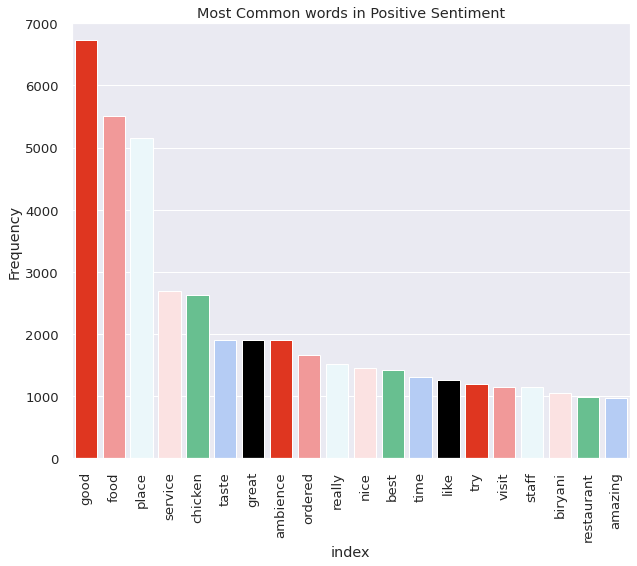

In [ ]:
# Most Common words in Positive Sentiment
word_frequency(merged_df[merged_df['SIA_Sentiment'] == 'Positive'],0,7000,'Most Common words in Positive Sentiment',
             ['#FF1E00','#FF8B8B','#E8F9FD','#FFDEDE','#59CE8F','#ABC9FF','#000000'])

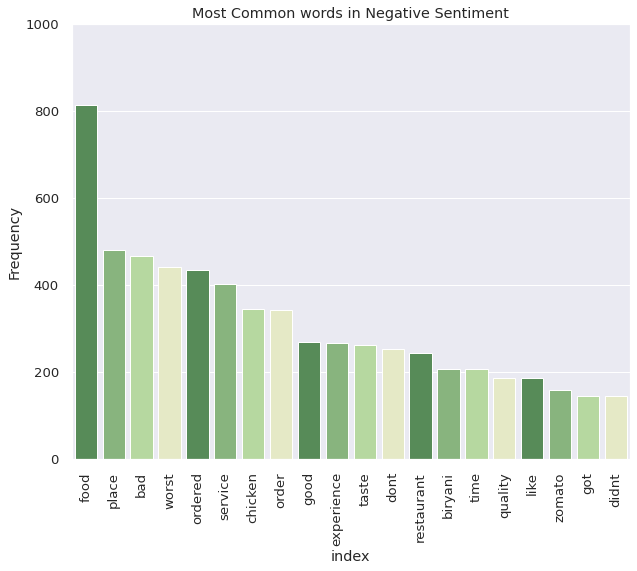

In [ ]:
# Most Common words in Negative Sentiment
word_frequency(merged_df[merged_df['SIA_Sentiment'] == 'Negative'],0,1000,'Most Common words in Negative Sentiment',
             ['#4E944F','#83BD75','#B4E197','#E9EFC0'])

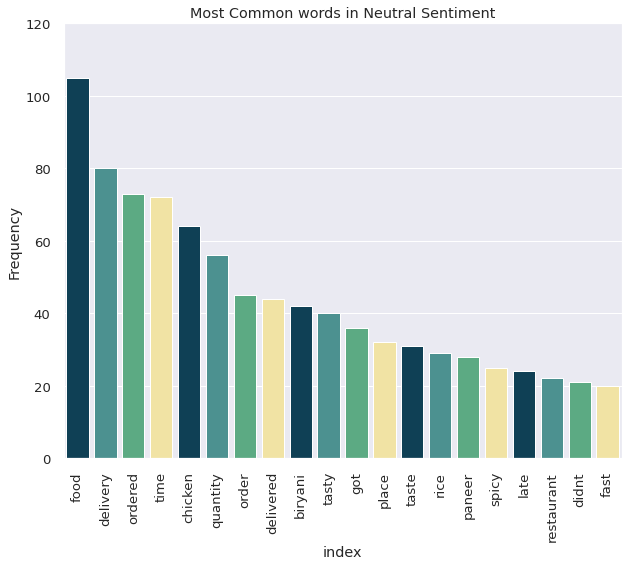

In [ ]:
# Most Common words in Neutral Sentiment
word_frequency(merged_df[merged_df['SIA_Sentiment'] == 'Neutral'],0,120,'Most Common words in Neutral Sentiment',
             ['#034561','#409D9B','#4FB783','#FEEB97'])

In [ ]:
merged_df.head(1)

,index,Name,Reviewer,Review,Reviews_txt_processed,Review_length,Rating,Polarity,Cost,Cuisines,SIA_polarity,SIA_Compound,SIA_Positive,SIA_Neutral,SIA_Negative,SIA_Sentiment
0,NaN,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,"['ambience', 'quite', 'saturday', 'lunch', 'co...",NaN,5.0,NaN,800,chinese continental kebab european south india...,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp...",0.9664,0.559,0.441,0.0,Positive


In [ ]:
# Restaurants with more number of positive reviews
rest_pos = pd.DataFrame(merged_df[merged_df['SIA_Sentiment'] == 'Positive'].groupby('Name')['SIA_Sentiment'].count()).reset_index()
rest_pos.sort_values(by = 'SIA_Sentiment',ascending = False,inplace = True)
rest_pos.rename({'SIA_Sentiment':'count'},axis = 1,inplace = True)

In [ ]:
rest_pos.head()

,Name,count
3,AB's - Absolute Barbecues,100
87,The Indi Grill,100
11,B-Dubs,100
97,Zega - Sheraton Hyderabad Hotel,98
35,Flechazo,98


In [ ]:
# Plot
def restuarants(df,title,ylim1,ylim2,color):
  plt.figure(figsize = (14,6))
  plot = sns.barplot(data = df,x = 'Name',y = 'count',palette = color)
  plt.title(title)
  plt.xticks(rotation = 90)
  plot.set(ylim=(ylim1, ylim2))
  plt.show()

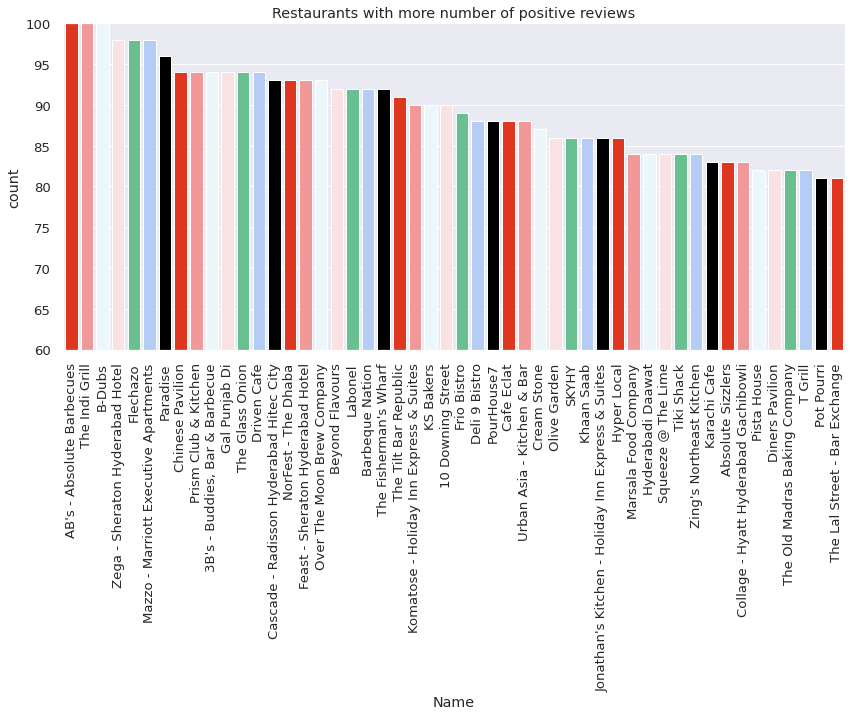

In [ ]:
# Plotting the Restaurants with more number of positive reviews
restuarants(rest_pos.iloc[0:50],'Restaurants with more number of positive reviews',60,100,['#FF1E00','#FF8B8B','#E8F9FD','#FFDEDE','#59CE8F','#ABC9FF','#000000'])

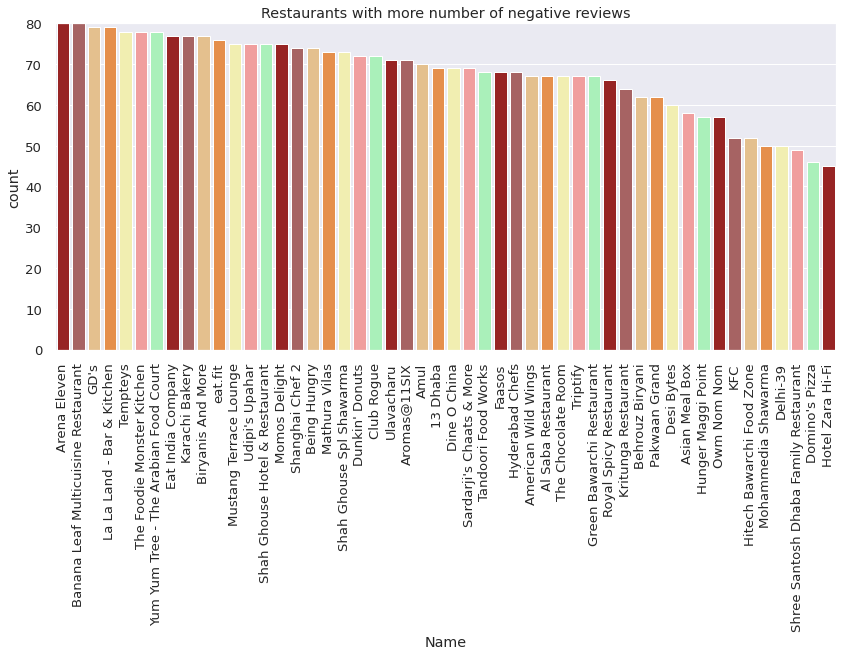

In [ ]:
# Plotting the Restaurants with more number of negative reviews
restuarants(rest_pos.iloc[-50:],'Restaurants with more number of negative reviews',0,80,
            ['#AA1111','#B15858','#F2C280','#FF8C32','#FCF8A6','#FD9191','#9EFCB4'])

In [ ]:
# Function for Restaurnts with best ratings
def restaurants_best(rating,ascending):
  temp = pd.DataFrame(merged_df.groupby('Name')['Cost','Rating'].mean()).reset_index()
  temp = temp[temp['Rating'] > rating]
  temp.sort_values(by = ['Cost','Rating'],ascending = ascending,inplace = True)
  return temp.head()

In [ ]:
# Function for Restaurnts with worst ratings
def restaurants_worst(rating,ascending):
  temp = pd.DataFrame(merged_df.groupby('Name')['Cost','Rating'].mean()).reset_index()
  temp = temp[temp['Rating'] < rating]
  temp.sort_values(by = ['Cost','Rating'],ascending = ascending,inplace = True)
  return temp.head()

In [ ]:
# Top 5 Affordable Restaurants with best ratings
restaurants_best(4,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Name,Cost,Rating
93,Udipi's Upahar,500.0,4.03
62,NorFest - The Dhaba,550.0,4.03
16,Beyond Flavours,800.0,4.28
67,Paradise,800.0,4.70
2,"3B's - Buddies, Bar & Barbecue",1100.0,4.76


In [ ]:
# Top 5 Affordable Restaurants with worst ratings
restaurants_worst(2.9,True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Name,Cost,Rating
10,Asian Meal Box,200.0,2.58
41,Hotel Zara Hi-Fi,400.0,2.40
66,Pakwaan Grand,400.0,2.71
57,Mathura Vilas,500.0,2.82
78,Shree Santosh Dhaba Family Restaurant,500.0,2.83


In [ ]:
# Top 5 Expensive Restaurants with best ratings
restaurants_best(4,False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Name,Cost,Rating
34,Feast - Sheraton Hyderabad Hotel,2500.0,4.22
19,Cascade - Radisson Hyderabad Hitec City,1800.0,4.26
97,Zega - Sheraton Hyderabad Hotel,1750.0,4.45
58,Mazzo - Marriott Executive Apartments,1700.0,4.19
11,B-Dubs,1600.0,4.81


In [ ]:
# Top 5 Expensive Restaurants with worst ratings
restaurants_worst(3,False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Name,Cost,Rating
21,Club Rogue,900.0,2.880
24,Delhi-39,600.0,2.975
83,The Chocolate Room,600.0,2.830
14,Behrouz Biryani,600.0,2.825
47,KFC,500.0,2.850


TextBlob Model

In [ ]:
from textblob import TextBlob

In [ ]:
# Applying TextBlob Model
merged_df['TextBlob_Polarity'] = merged_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



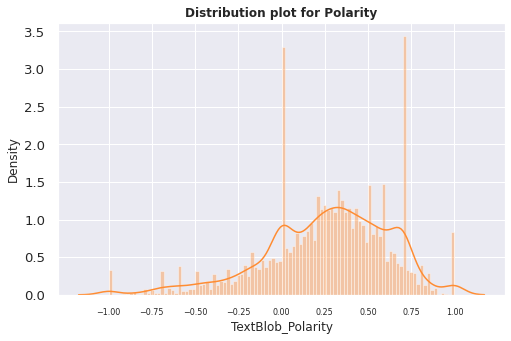

In [ ]:
# SIA distribution plot
dist_polarity(merged_df['TextBlob_Polarity'],'TextBlob_Polarity','#FF8C32')

### We can clearly see that most of the Reviews are 'Neutral' or 'Positive'

In [ ]:
# Mapping the sentiment as Positive for SIA_Sentiment > 0
# Positive for TextBlob_Polarity > 0
# Negative for TextBlob_Polarity < 0
# Neutral for TextBlob_Polarity = 0
merged_df['TextBlob_Sentiment'] = merged_df['TextBlob_Polarity'].apply(lambda x: 'Positive' if (x > 0) else ('Negative' if (x<0) else 'Neutral'))

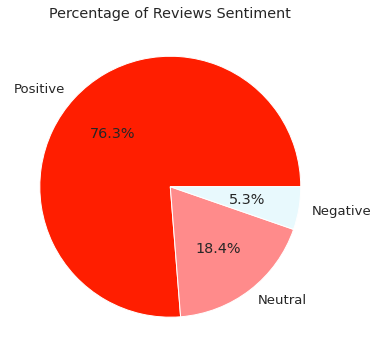

In [ ]:
# Pie chart
piechart(merged_df['TextBlob_Sentiment'],colors = ['#FF1E00','#FF8B8B','#E8F9FD'])

In [ ]:
# Reviews Sentiment
merged_df['TextBlob_Sentiment'].value_counts()

Positive    7591
Negative    1835
Neutral      528
Name: TextBlob_Sentiment, dtype: int64

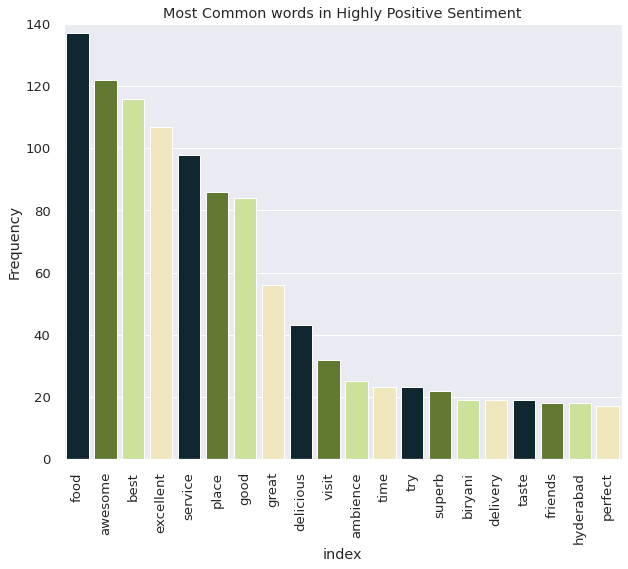

In [ ]:
# Most Common words in Highly Positive Sentiment
word_frequency(merged_df[merged_df['TextBlob_Polarity'] > 0.80],0,140,'Most Common words in Highly Positive Sentiment',
             ['#092A35','#658525','#CFEE91','#F8EEB4'])

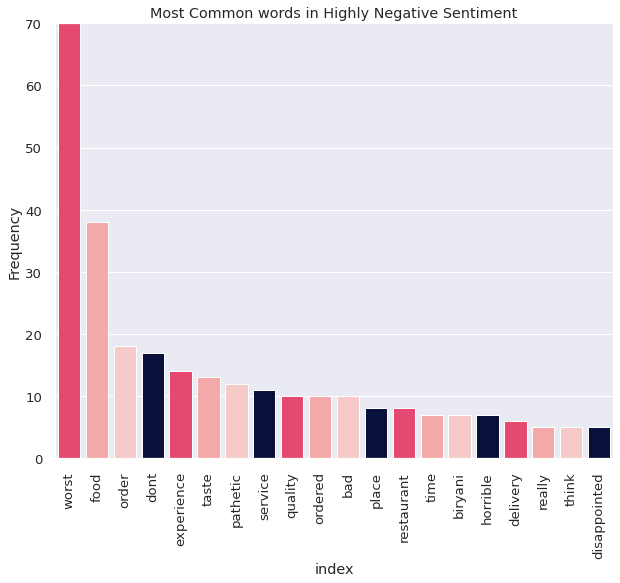

In [ ]:
# Most Common words in Highly Negative Sentiment
word_frequency(merged_df[merged_df['TextBlob_Polarity'] < -0.80],0,70,'Most Common words in Highly Negative Sentiment',
             ['#FF2E63','#FF9D9D','#FFC2C2','#010A43'])

Model Comparison

In [ ]:
model_com = pd.DataFrame((merged_df['TextBlob_Polarity'],merged_df['SIA_Compound'])).T.reset_index()

In [408]:
model_com.head()

,index,TextBlob_Polarity,SIA_Compound
0,0,0.660000,0.9664
1,1,0.708333,0.9360
2,2,0.550000,0.9186
3,3,0.750000,0.8591
4,4,0.525000,0.9201


In [413]:
#plotting
fig = px.scatter(merged_df, x="TextBlob_Polarity", y="SIA_Compound", color="Name", width=1500, height=800)
fig.show()

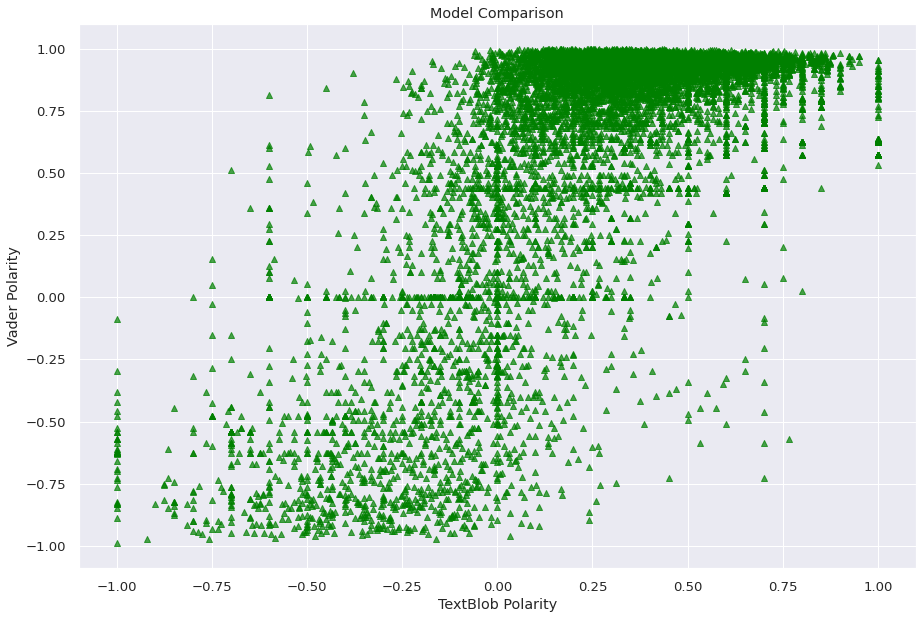

In [ ]:
# Scatter plot for model comparison
plt.figure(figsize = (15,10))
plt.scatter(data = model_com, x = 'TextBlob_Polarity', y = 'SIA_Compound',marker='^', color = 'green',alpha = 0.7)

plt.title('Model Comparison')
plt.xlabel('TextBlob Polarity')
plt.ylabel('Vader Polarity')
plt.show()

# Conclusion

1. **North Indian** Cuisine has the highest count among all
2. **Collage - Hyatt Hyderabad Gachibowli** is the expensive hotel with cost of 2800
3. Calculated **k = 15** as optimum vale, for cuisine clusters.
4. Most of the hotels ae given 5 Rating
5. **Anvesh Chowdary** was the most reviewer and given many hotel rating.
6. **AB's - Absolute Barbecues**  has given most of the **positive reviews** and **Arens Eleven** Got the **highest negative review**
7.**Udipi's Upahar** is  Affordable Restaurant with best ratings
8. **Club Rogue** is Expensive Restaurant with worst ratings